## Worksheet 2

### This is the second set of exercises for the Open Quantum Systems course. As before, there are both analytical and numerical components to the exercises. Each of the 8 questions below is worth 4 marks. 

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True #comment this line if LaTeX is not installed in your system

## 1. 
Hamiltonian dynamics for mixed states (in the Schrödinger picture) is described by the von Neumann equation 

$$\frac{{\rm d}\hat{\rho}}{{\rm d}t} = \frac{1}{{\rm i}\hbar}[\hat{H},\hat{\rho}].$$

Suppose that the Hamiltonian comprises a sum of two terms, $\hat{H} = \hat{H}_0 + \hat{H}_1$. The density matrix in the interaction picture generated by $\hat{H}_0$ is defined by

$$ \hat{\rho}_I(t) = \hat{U}^\dagger_0(t,t_0) \hat{\rho}(t) \hat{U}_0(t,t_0),$$

where $\hat{U}_0(t,t_0) = {\rm e}^{-{\rm i}\hat{H}_0 (t-t_0)/\hbar}$, $\hat{\rho}(t)$ is the density matrix in the Schrödinger picture, and $t_0$ is an (arbitrary) initial time. Show that the state in the interaction picture obeys a differential equation of the form

$$ \frac{{\rm d}\hat{\rho}_I}{{\rm d}t} = \frac{1}{{\rm i}\hbar} [\hat{H}_I(t), \hat{\rho}_I(t)],$$

and give an explicit expression for the interaction-picture Hamiltonian $\hat{H}_I(t)$. 

What is the general solution of this equation in terms of the initial condition $\hat{\rho}(t_0)$?

## 2.
A thermal equilibrium state is a mixed state with two key properties: <br>
    (i) it is stationary (unchanging) under Hamiltonian dynamics and <br>
    (ii) the probability $p_i$ of finding the system with energy $E_i$ is given by the Boltzmann distribution of statistical mechanics, i.e. $p_i = {\rm e}^{-\beta E_i}/Z$, where $\beta = 1/k_BT$ is the inverse temperature and $Z = \sum_i {\rm e}^{-\beta E_i}$ is the partition function.<br>

In quantum mechanics, the thermal state of a system whose dynamics are governed by the Hamiltonian $\hat{H}$ is given by

$$\hat{\rho}_\beta = \frac{{\rm e}^{-\beta \hat{H}}}{Z}, $$

where $Z = {\rm tr}[{\rm e}^{-\beta \hat{H}}]$.

(a) Show that this state obeys both properties (i) and (ii).    

(b) For a qubit with Hamiltonian $\hat{H} = \tfrac{1}{2}\hbar\omega \hat{\sigma}_z$, show that

$$ \hat{\rho}_\beta = \frac{1}{2}\left[\hat{\mathbb{1}} - \tanh(\beta\hbar\omega/2) \hat{\sigma}_z\right].$$

(Hint: take a look at Exercise 1(a), Worksheet 1)


(c) Find analytical expressions for the expectation values of the three Pauli matrices in the above thermal equilibrium state. Plot the thermal expectation value of $\langle \hat{\sigma}_z\rangle$ as a function of dimensionless temperature, $k_B T/\hbar\omega$.

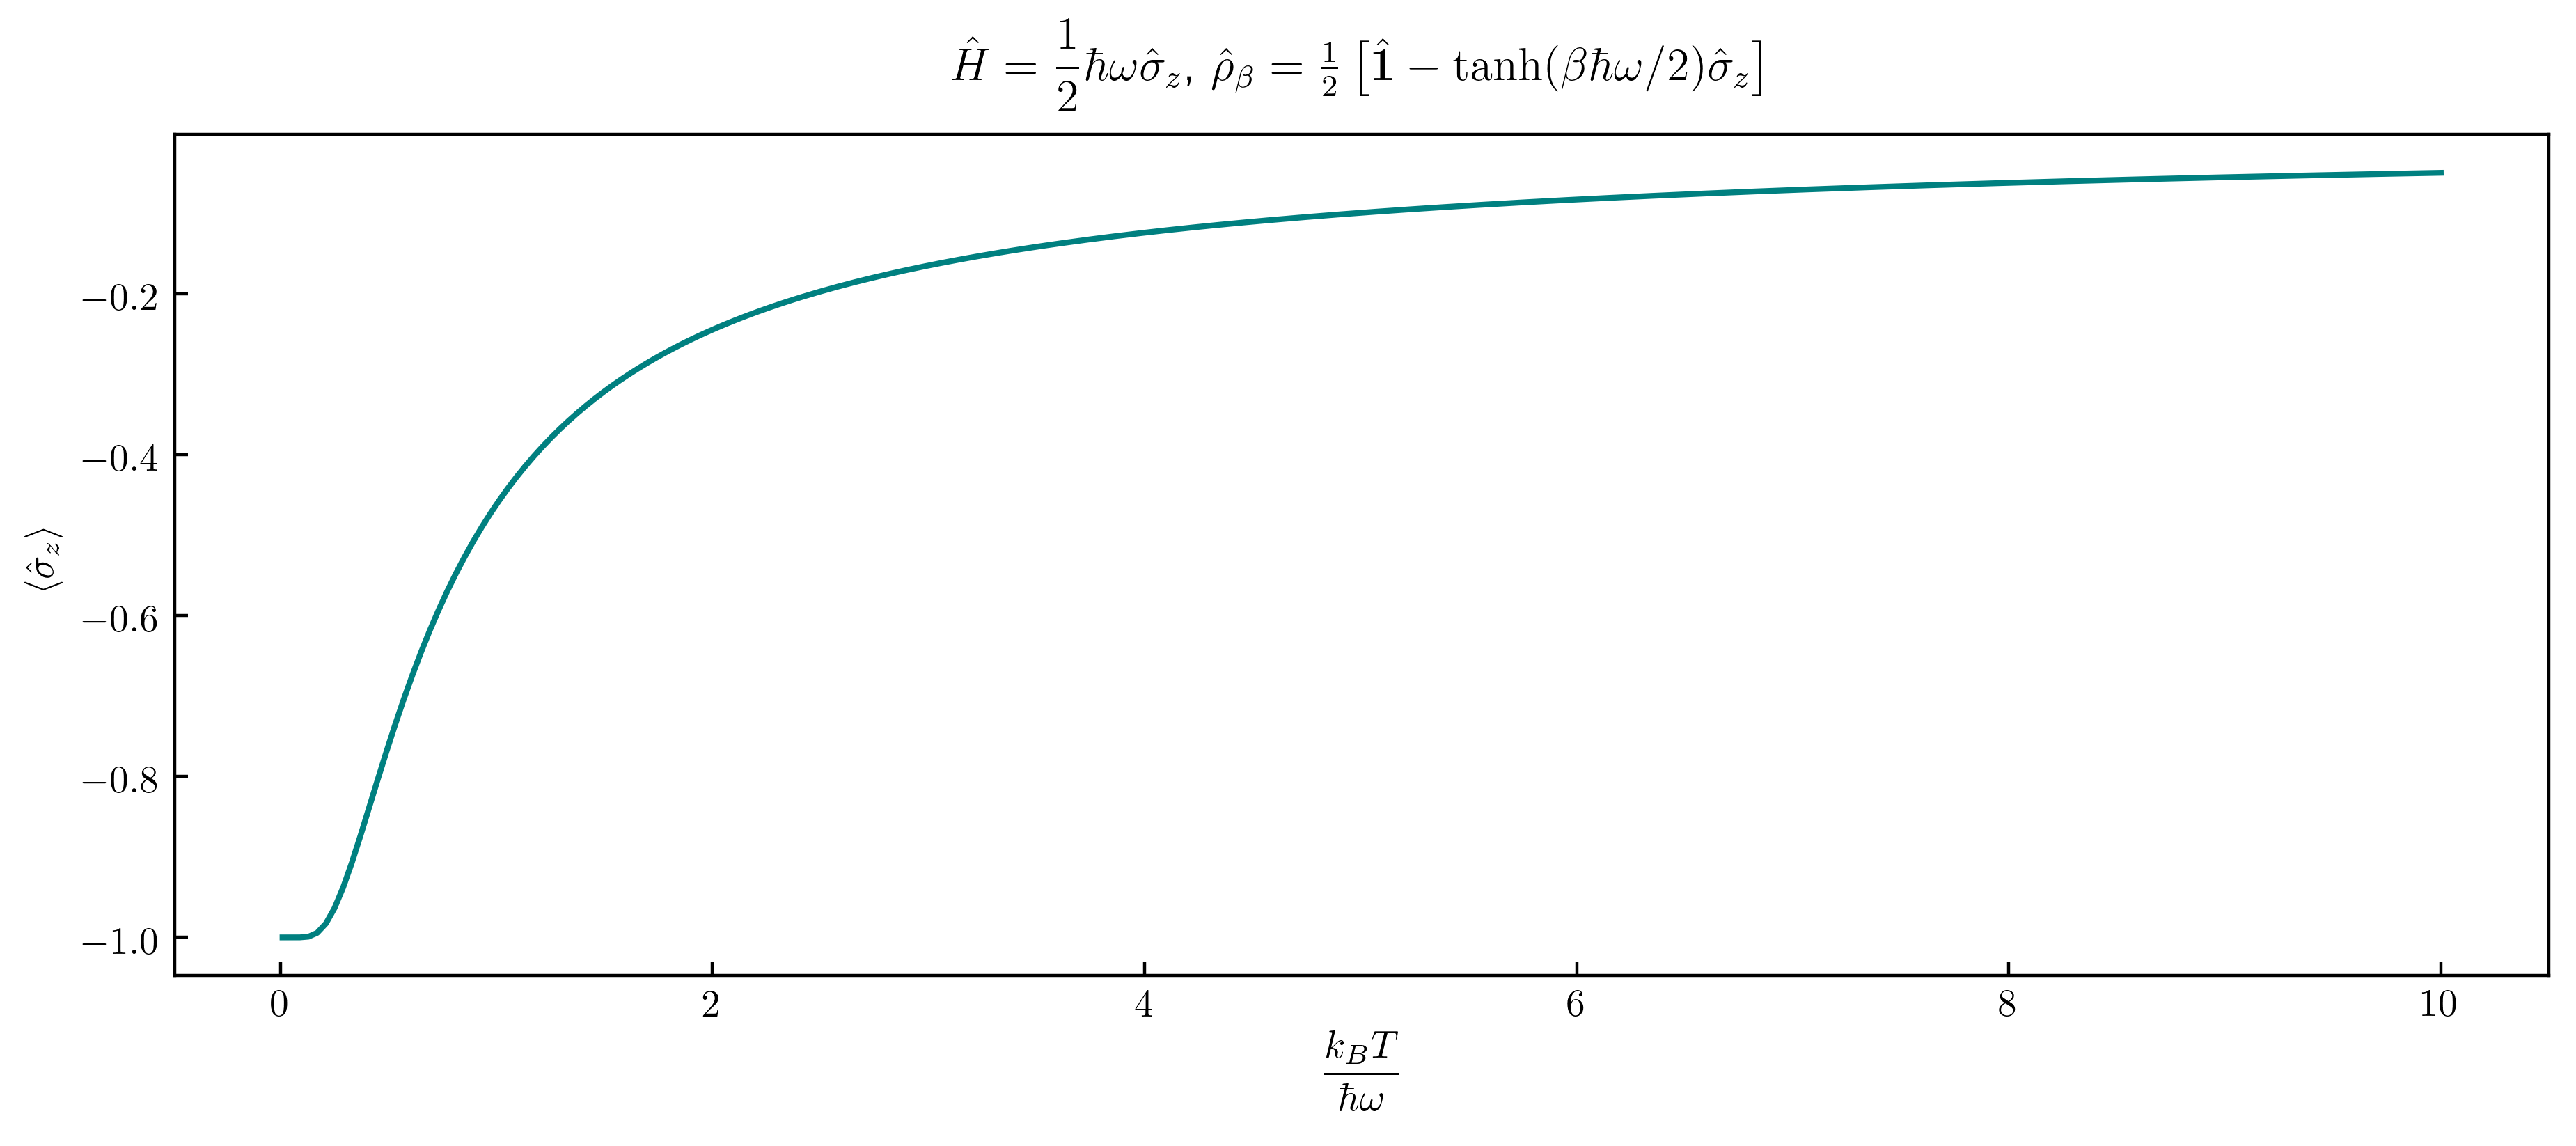

In [2]:
#initialising temperature variable (T=0 will raise an error so it is avoided)
temperature_size = 250
T_dimentionless = np.linspace(0.01, 10, temperature_size)

plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")

plt.plot(T_dimentionless, [-np.tanh(1/(2*i)) for i in T_dimentionless], c='teal') #plotting data

plt.xlabel(r'$\displaystyle\frac{k_BT}{\hbar\omega}$')
plt.ylabel(r'$\langle\hat{\sigma}_z\rangle$')
plt.title(r'$\displaystyle\hat{H}=\frac{1}{2}\hbar\omega\hat{\sigma}_z$, $\hat{\rho}_\beta = \frac{1}{2}\left[\hat{\mathbf{1}} - \tanh(\beta\hbar\omega/2) \hat{\sigma}_z\right]$')
plt.show()

## 3. 
The following function samples a "biased coin", which gives the result 0 (heads) with probability p and gives the result 1 (tails) with probability 1-p. Play around with it and try to understand how it works.

In [3]:
from random import random
def biased_coin(p):
    r = random()
    if r<p:
        return 0
    else:
        return 1

(a) Plot a histogram of 200 realisations of the output of biased_coin() for p=0.3. (Hint: check out the [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function).

P(0) 0.305
P(1) 0.695


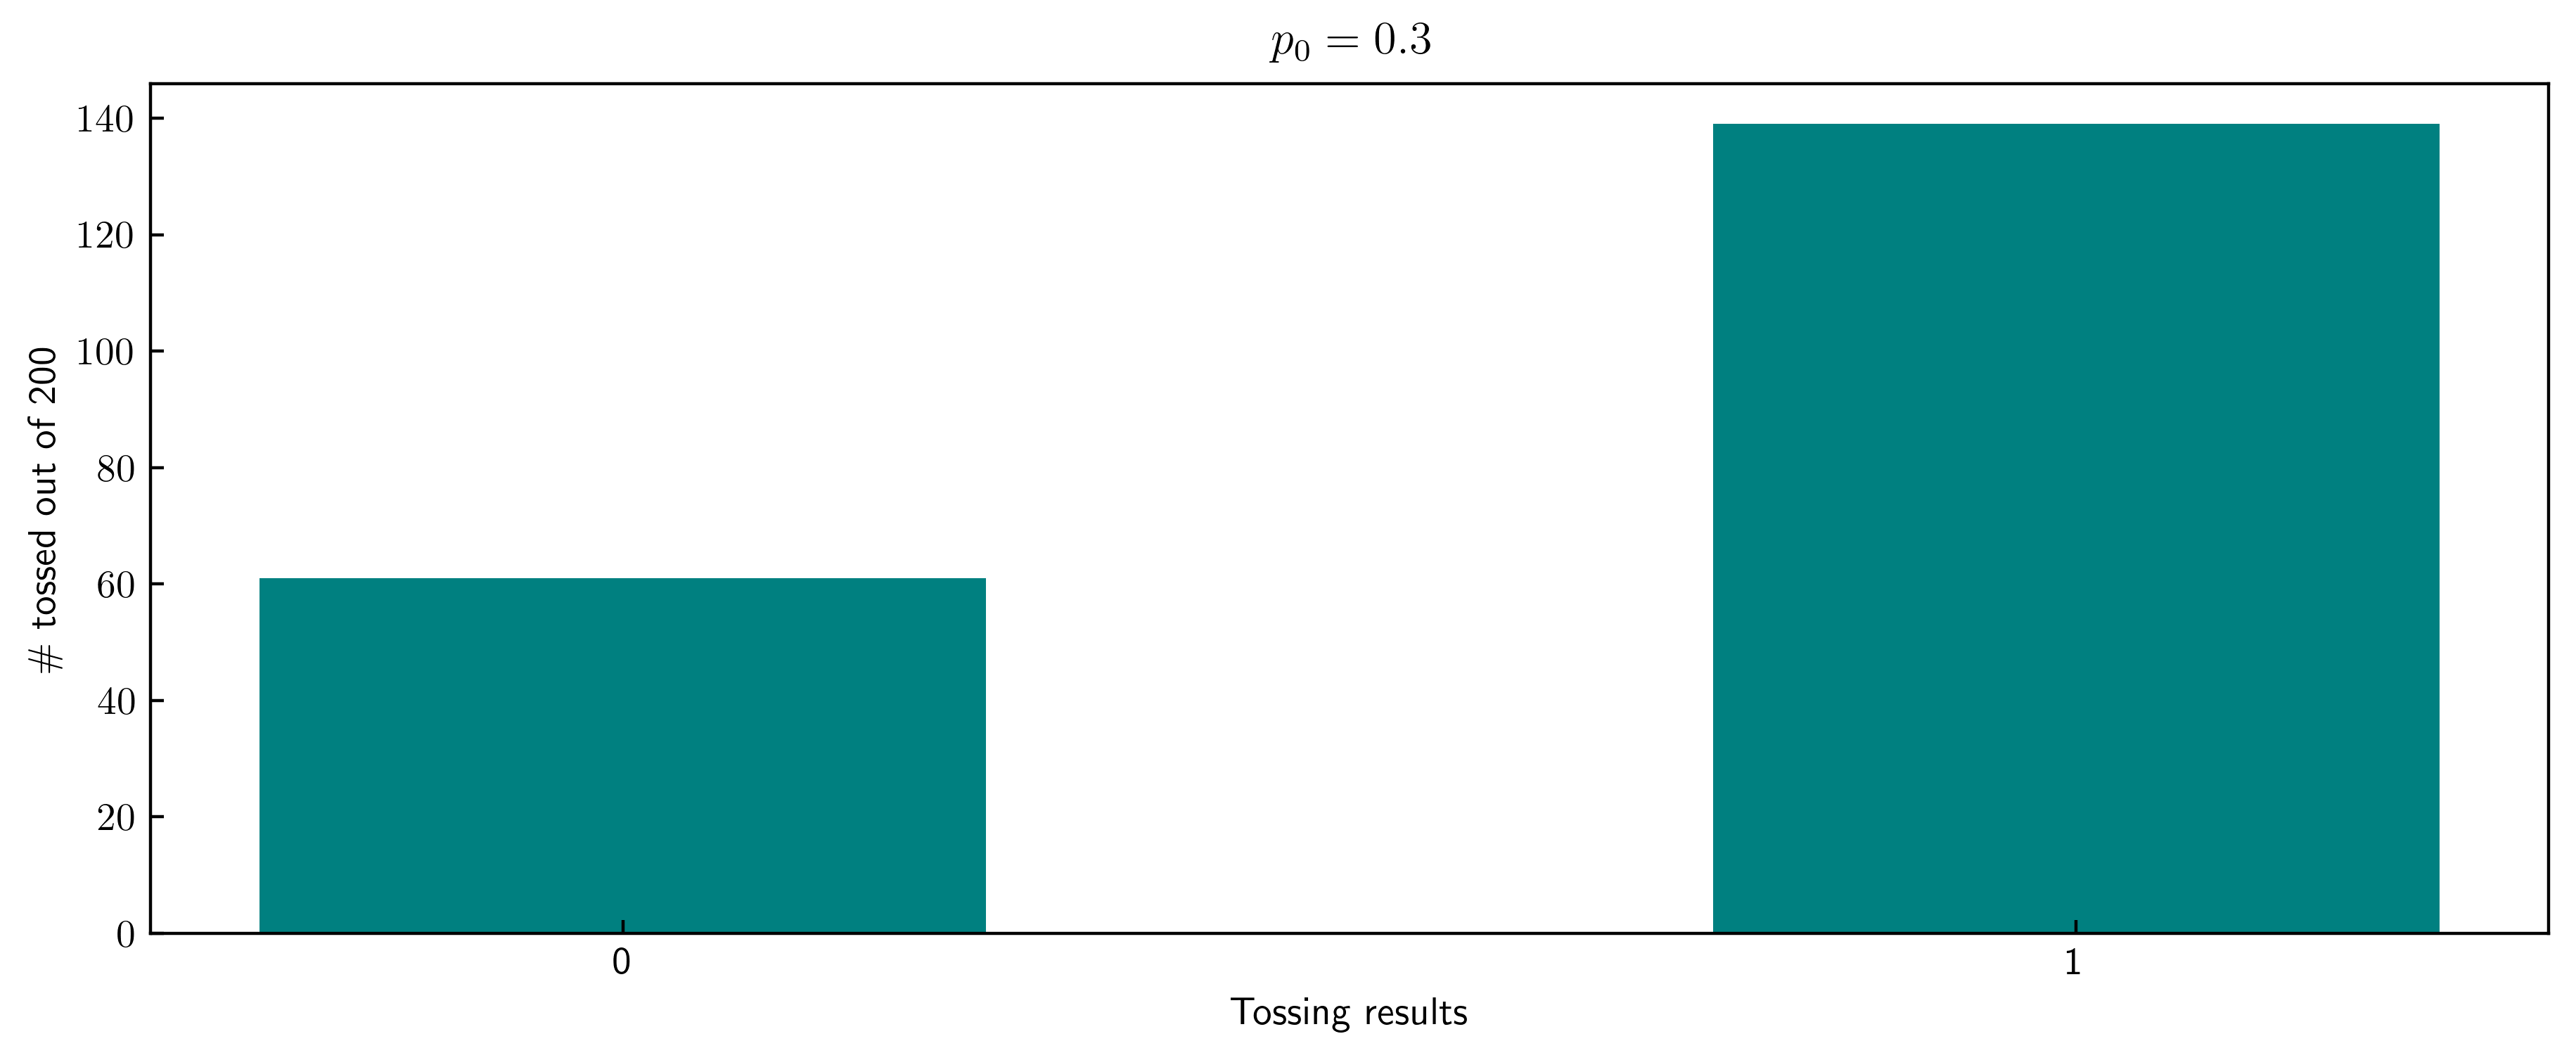

In [4]:
import matplotlib.pyplot as plt
tosses = 200
p = 0.3
outputs = [biased_coin(p) for i in range(tosses)]
plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.hist(outputs, [-.25,.25,.75,1.25], color='teal')
print('P(0)',sum([i==0 for i in outputs])/tosses)
print('P(1)',sum([i==1 for i in outputs])/tosses)
plt.xticks([0,1], ['0', '1'])
plt.xlabel(r'Tossing results')
plt.ylabel(r'\# tossed out of '+str(tosses))
plt.title(r'$p_0 = 0.3$')
plt.show()

(b) Write an analogous function that samples a "three-sided coin", which yields the result 0 with probability $p_0$, 1 with probability $p_1$, and 2 with probability $1-p_0-p_1$. Plot a histogram of 200 samples of the output  for $p_0=0.2$ and $p_1 = 0.5$.

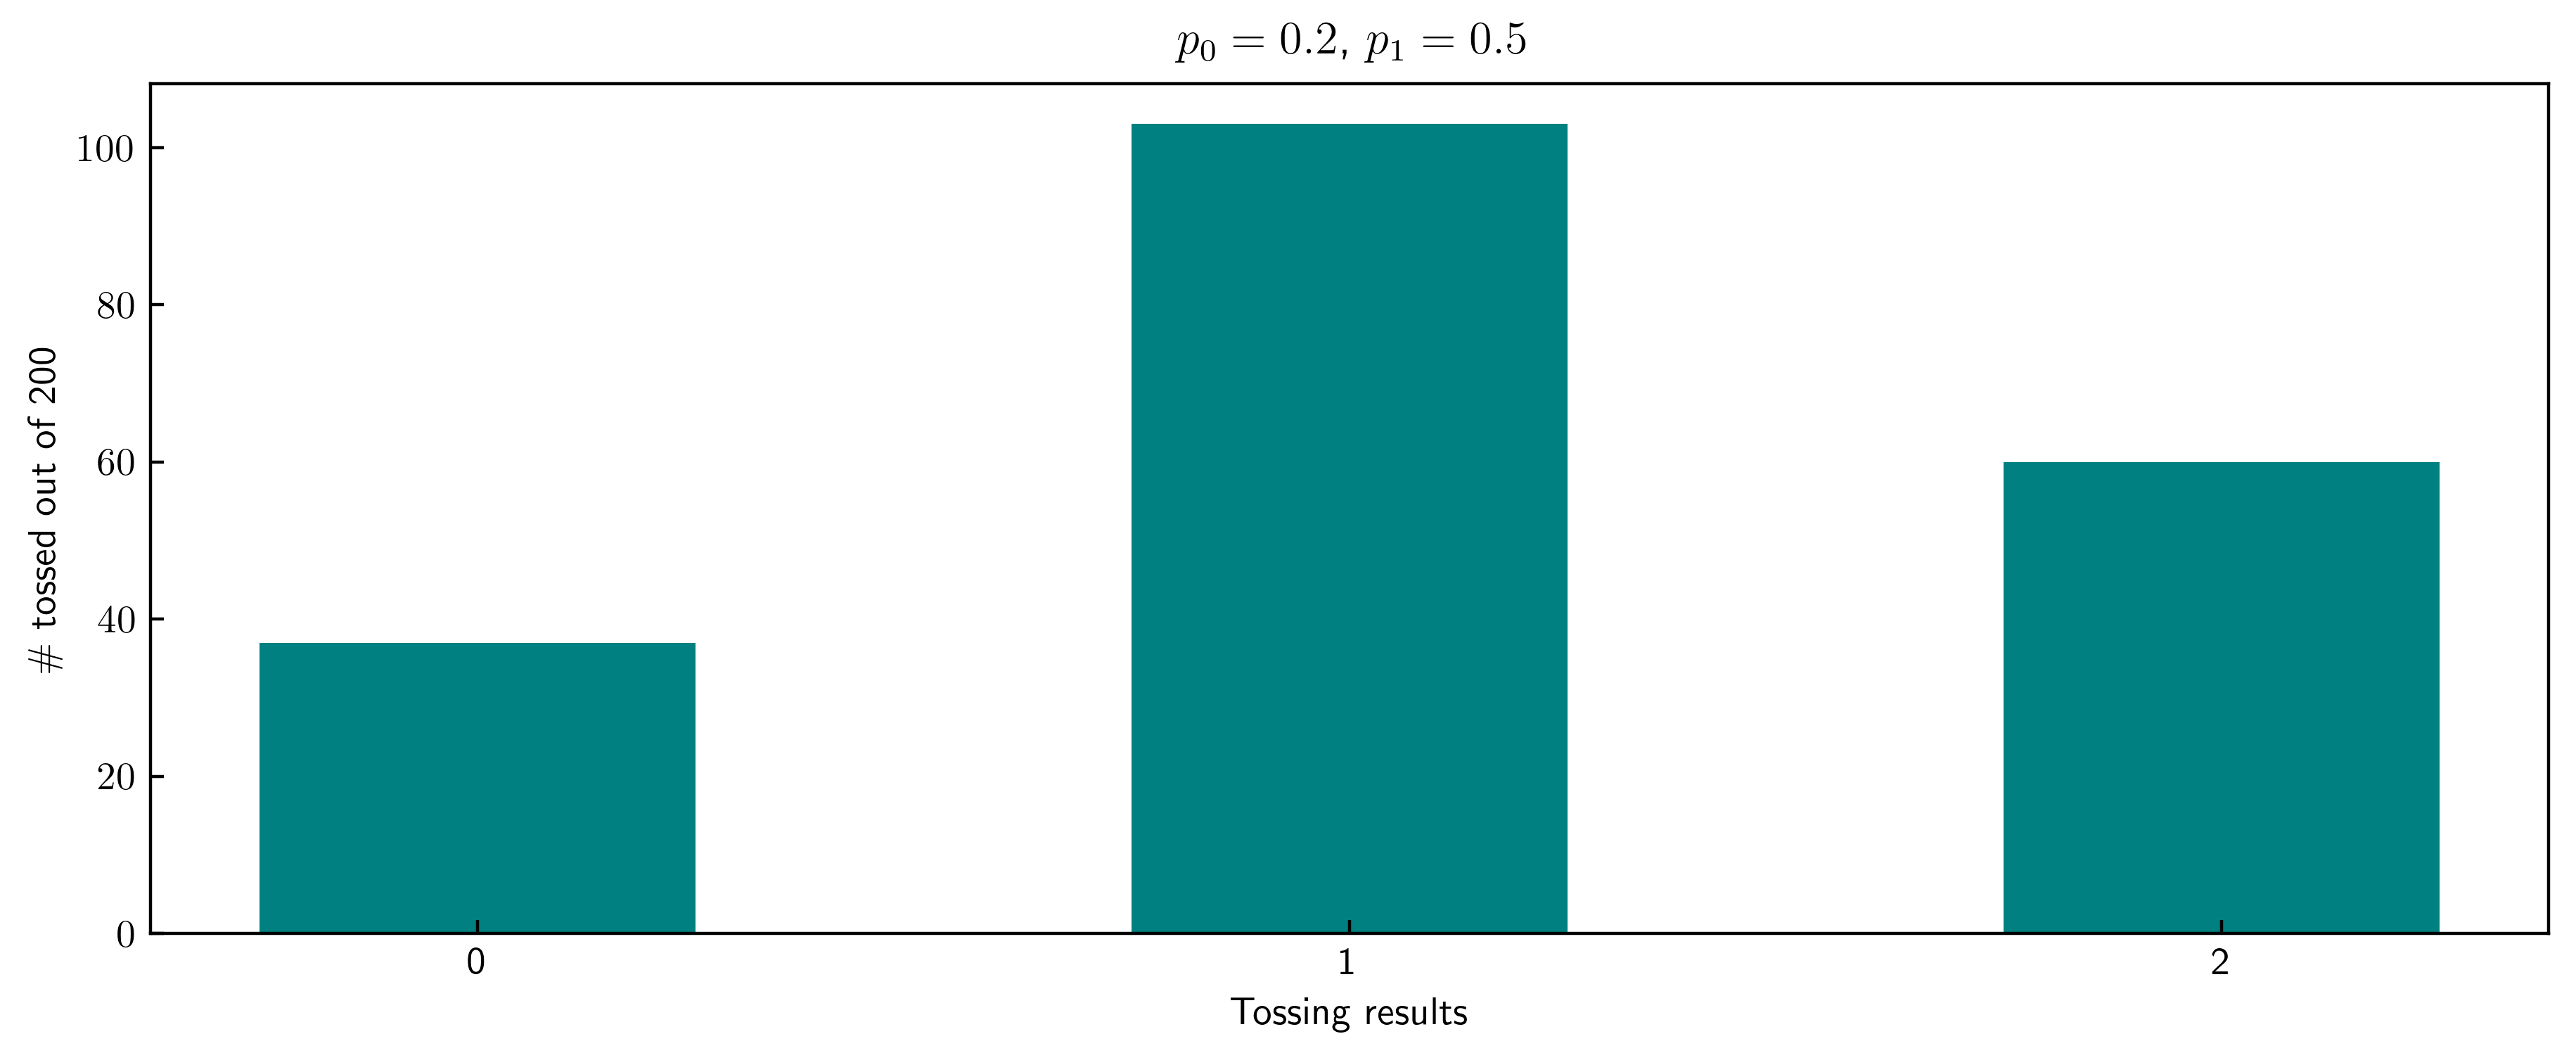

P(0) 0.185
P(1) 0.515
P(2) 0.3


In [5]:
#new function, analog to biased_coin but
def triple_coin(p0, p1):
    r = random()
    if r < p0:
        return 0
    elif r < p0 + p1:
        return 1
    else:
        return 2
#defining values    
tosses = 200
p0, p1 = .2, .5
outputs = [triple_coin(p0, p1) for i in range(tosses)]

plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.hist(outputs, [-.25,.25,.75,1.25, 1.75, 2.25], color='teal')
plt.xticks([0,1,2], ['0', '1', '2'])
plt.xlabel(r'Tossing results')
plt.ylabel(r'\# tossed out of '+str(tosses))
plt.title(r'$p_0 = 0.2$, $p_1 = 0.5$')
plt.show()
print('P(0)',sum([i==0 for i in outputs])/tosses)
print('P(1)',sum([i==1 for i in outputs])/tosses)
print('P(2)',sum([i==2 for i in outputs])/tosses)

(c) Generalise the function to an "$N$-sided coin", which yields the result $i \in \{0,1,2,\ldots,N-1\}$ with probability $p_i$. Provide a histogram demonstrating that the function works as expected.

Input probabilities: [0.04754539560704929, 0.3044776577547769, 0.017868902006549225, 0.1331885652668774, 0.0341920130311664, 0.026437093454095912, 0.04350425049996894, 0.09026348446093908, 0.09812445442626572, 0.20109009729084568, 0.0033080862014652768]
Possible outcomes obtained: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
Probabilities in the numerical distribution: [0.0464, 0.3049, 0.0183, 0.1328, 0.035, 0.0257, 0.0427, 0.0952, 0.0988, 0.1967, 0.0035]


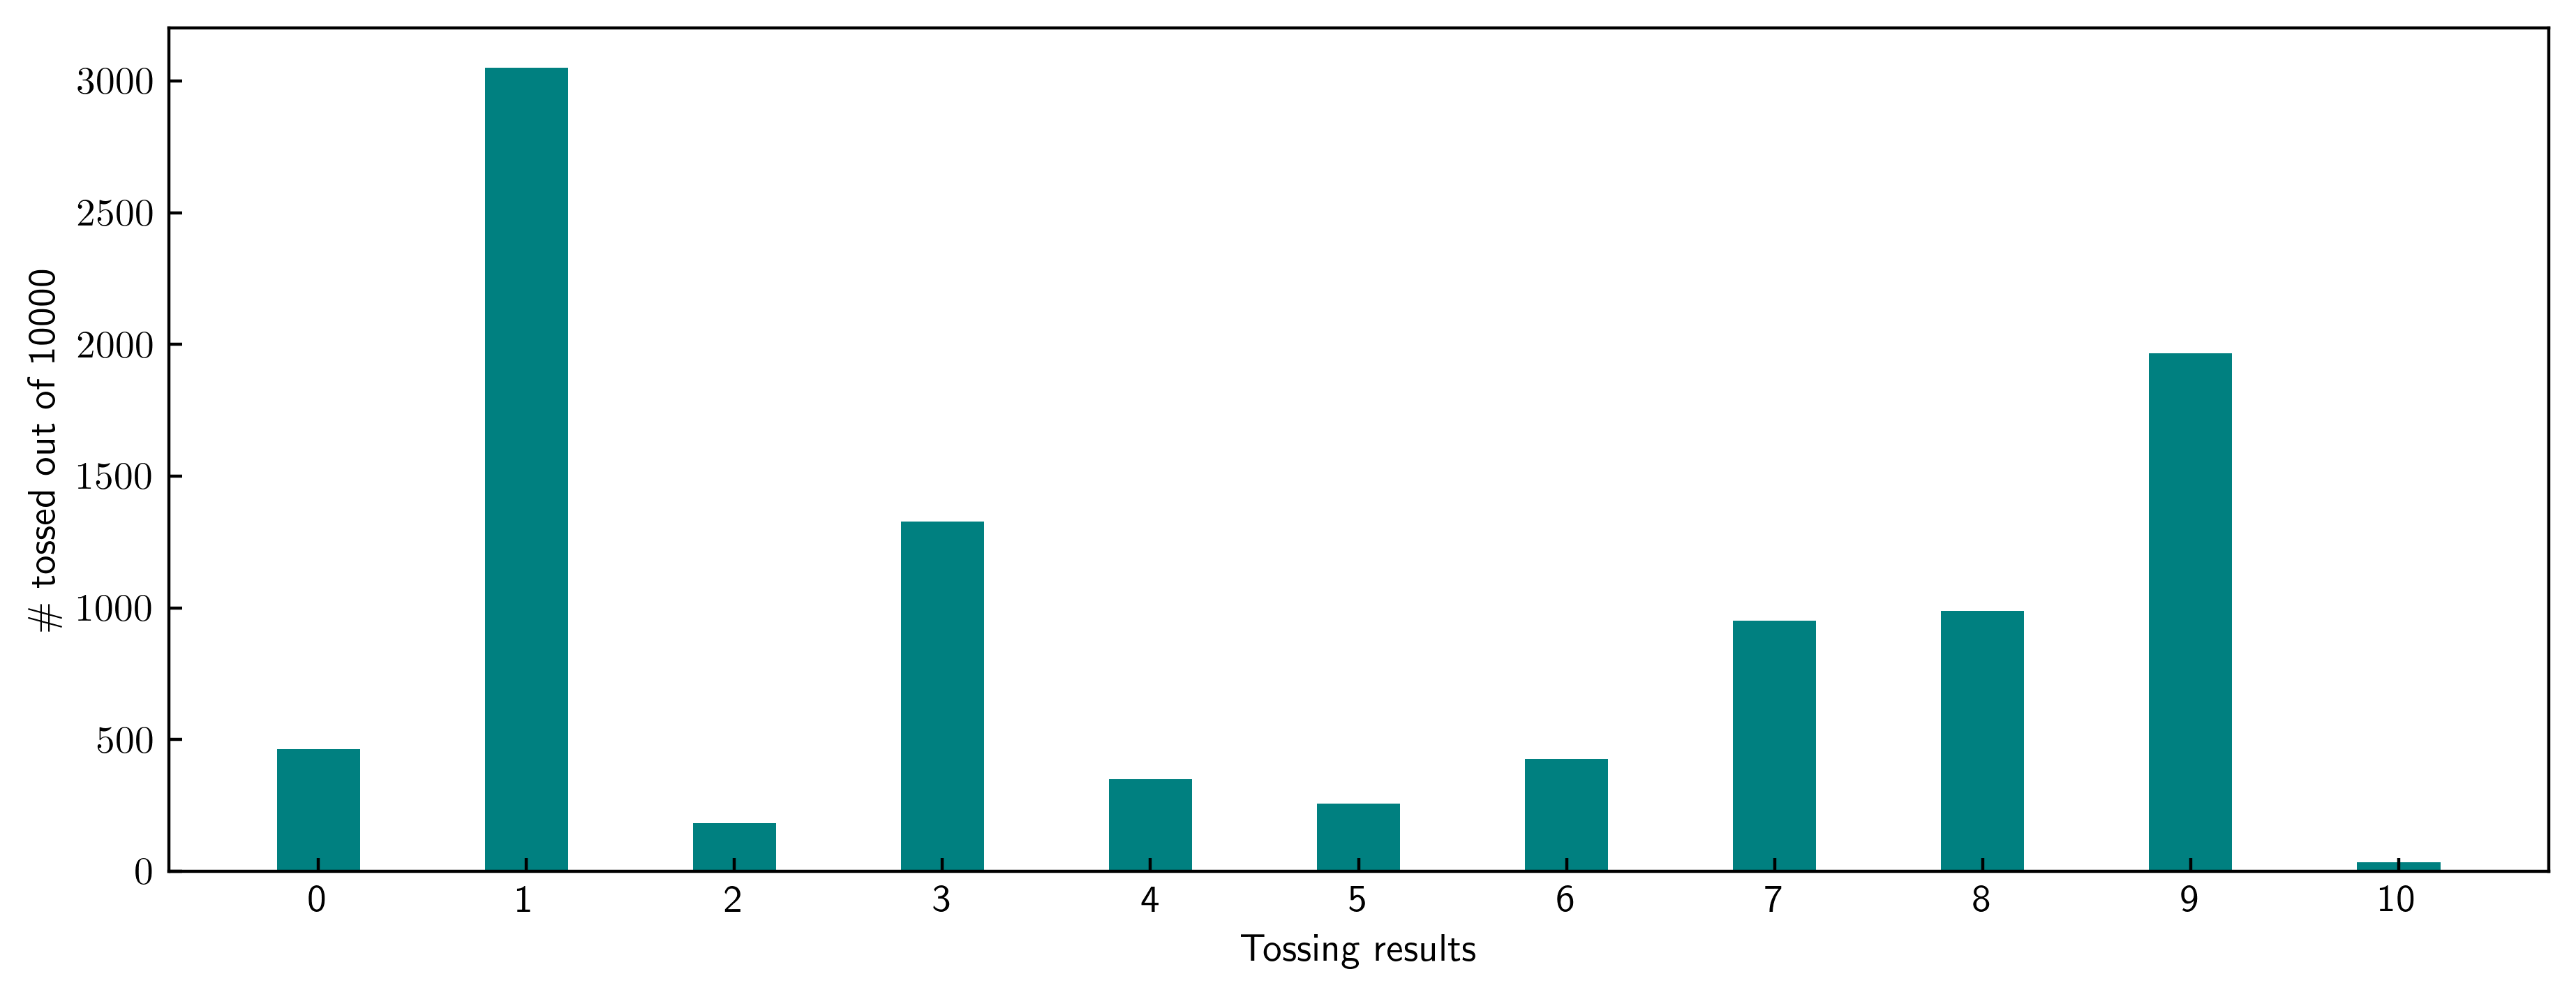

In [6]:
import numpy as np
#the function returns a value proportional to the number of different results, 
#and the probability of each value corresponds to every value in pn
#it only works for distributions with integer outcomes
def n_coin(pn):
    r = random()
    cumulative = np.cumsum(pn)
    return sum([j<r for j in cumulative]) #list with as many Trues (1's) as the output should be, the rest are Falses (0's)

tosses = 10000
#a list with random probabilities is created to show that it works for any list of probabilities
#if a longer list is desired, the appended random number can be divided by x>1 so that it takes longer to add probabilities up to 1
pn = []
while sum(pn)<1:
    pn.append(random()/3)
pn = pn[:-1]
pn.append(1-sum(pn))
print('Input probabilities:', pn)
outputs = [n_coin(pn) for i in range(tosses)]
print('Possible outcomes obtained:', set(outputs))
print('Probabilities in the numerical distribution:',[sum([j==i for j in outputs])/tosses for i in range(len(pn))])

#setting the bins position so the plot looks nicer
bins = []
for i in range(len(pn)):
    bins.append(i-.2)
    bins.append(i+.2)
    
plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.hist(outputs, bins, color='teal')
plt.xticks([i for i in range(len(pn))], [str(i) for i in range(len(pn))])
plt.xlabel(r'Tossing results')
plt.ylabel(r'\# tossed out of '+str(tosses))
plt.show()        

(d) Can you generalise this to sample from a continuous probability distribution? Write a function that outputs a random number $x$ in the interval $x\in [0,1]$ according to the probability density $$ p(x) = \frac{\pi}{2} \sin(\pi x).$$ Demonstrate your function with a histogram.

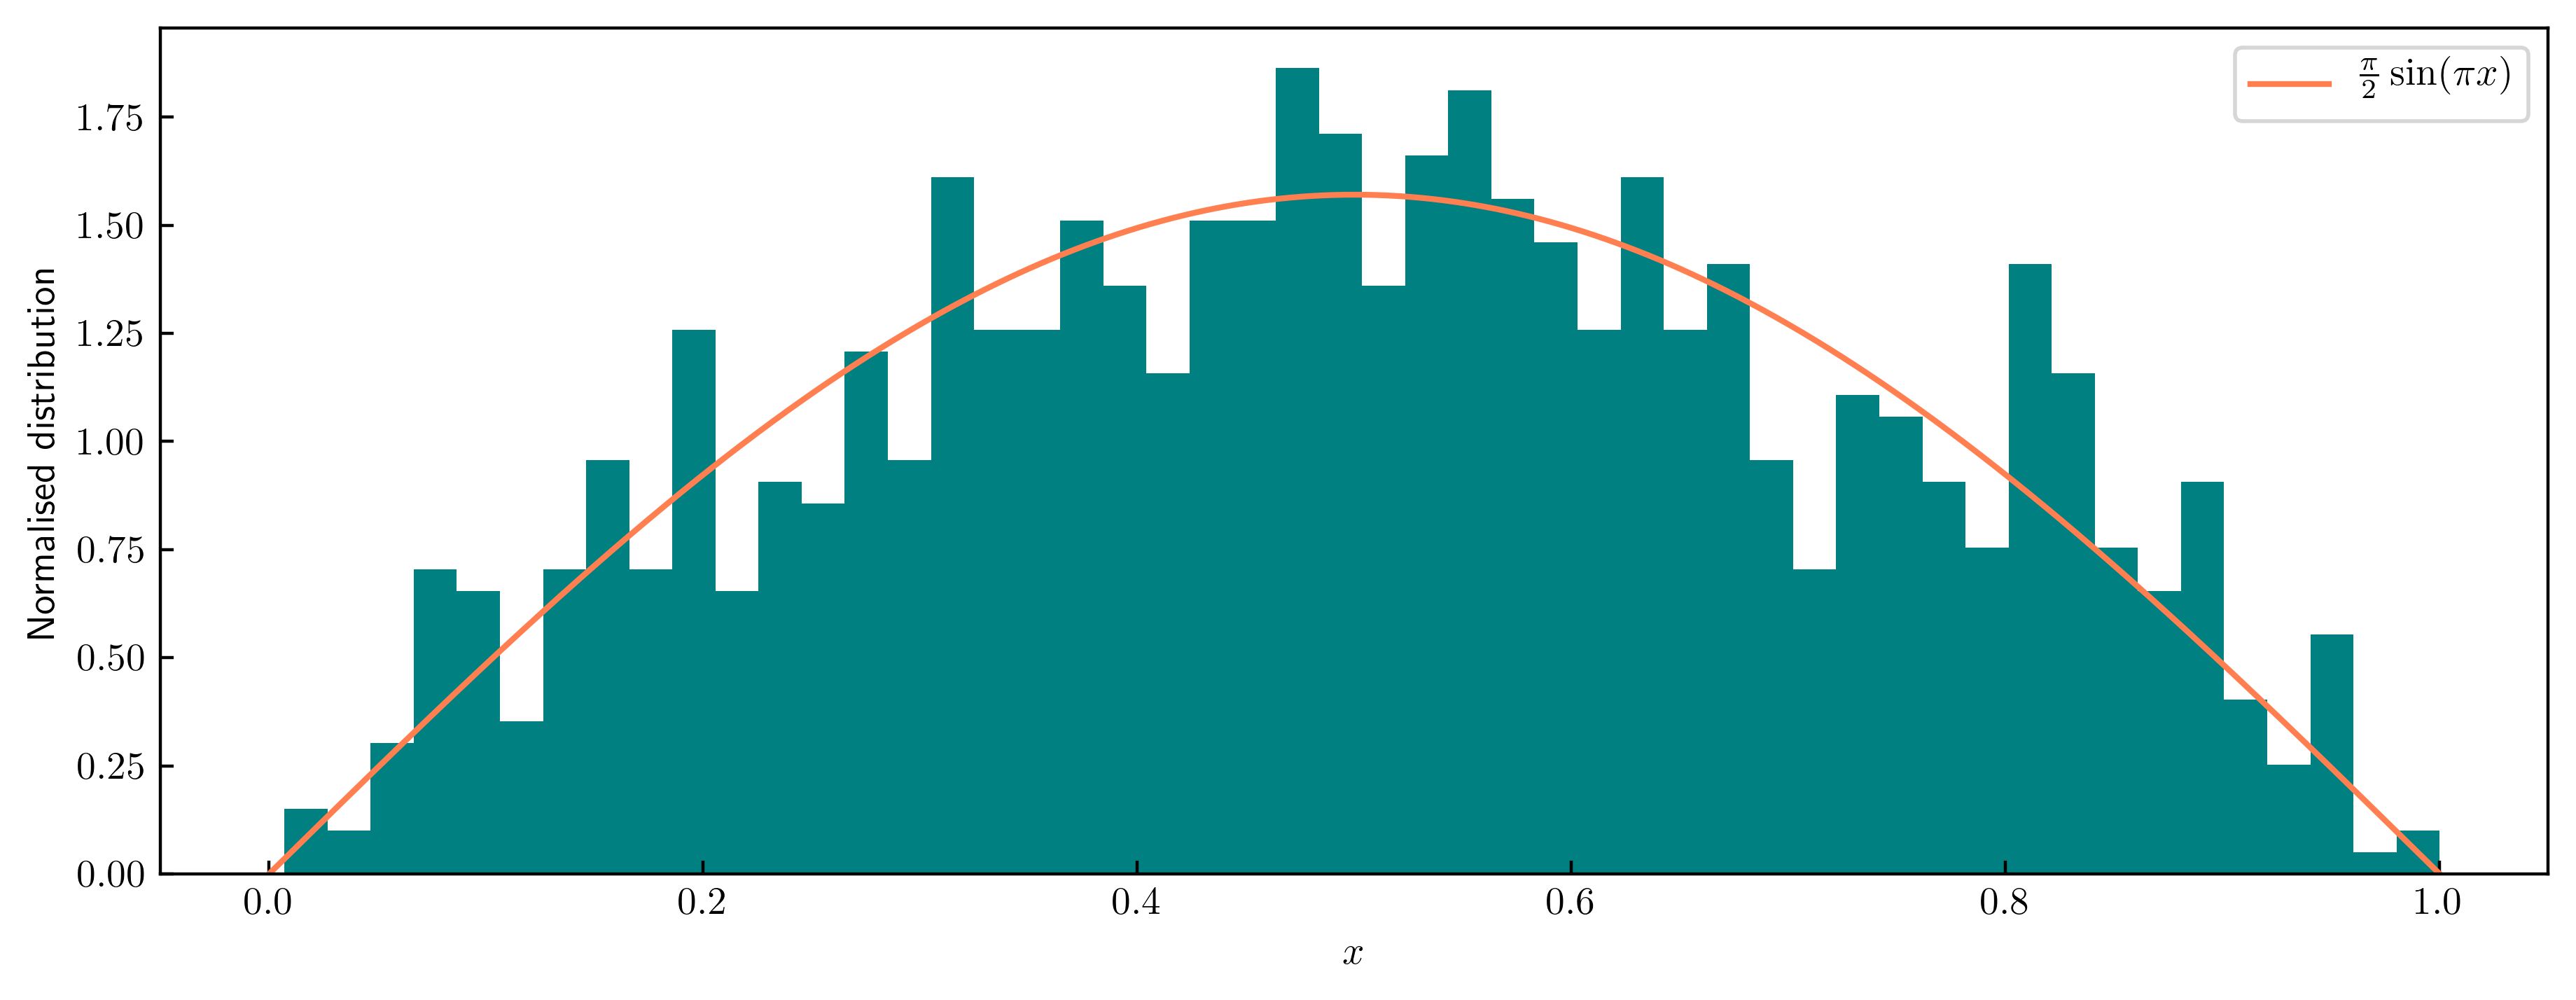

In [7]:
def prob_distribution(x):
    return np.pi/2*np.sin(np.pi*x)

tosses = 1000
x = np.linspace(0, 1, tosses)
pn = prob_distribution(x)

#similar to the previous idea, only this time the function makes sure the input prob distribution is normalised 
#and the outcome is not an integer but a number between 0 and 1 (which is almost a continuous value for a sample big enough)
def continuous_distr(pn, size = 200):
    total_sample = []
    for i in range(size):
        r = random()
        norm = sum(pn)
        normalised_distr = [i/norm for i in pn]
        cumulative = np.cumsum(normalised_distr)
        sample = sum([j<r for j in cumulative]) #list with as many True's (1's) as the output should be
        total_sample.append(sample)
    #normalisation of the frequencies
    total_sample = [i/max(total_sample) for i in total_sample]
    return total_sample

outputs = [continuous_distr(pn, tosses)]

plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.plot(x, pn, label=r'$\frac{\pi}{2} \sin(\pi x)$', c='coral', zorder=2) #probability distribution
plt.hist(outputs, bins=50, density=True, color='teal', zorder=1) #histogram with the sample following said distribution
plt.xlabel(r'$x$')
plt.ylabel(r'Normalised distribution')
plt.legend()
plt.show()  

## 4.
In this exercise we will compare the thermal state of a qubit
$$ \hat{\rho}_\beta = \frac{{\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2}}{Z},$$
to the pure state
$$|\psi_\beta\rangle = \frac{1}{\sqrt{Z}}\left({\rm e}^{-\beta\hbar\omega/4}|0\rangle + {\rm e}^{\beta\hbar\omega/4}|1\rangle\right), $$
where $Z = {\rm tr}({\rm e}^{-\beta\hbar\omega\hat{\sigma}_z/2})$.

(a) Write down general expressions for the density matrices corresponding to both of the above states.

(b) Consider a projective measurement of the observable $\hat{\sigma}_z$. Give the probabilities of the two measurement outcomes for the thermal state $\hat{\rho}_\beta$. Give the analogous measurement outcome probabilities for the pure state $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_z\rangle$ for both states. Comment briefly on the results.

Comment: Since $\langle\hat{\sigma}_z\rangle$ is the same for both states, it is not possible to distinguish them via projective measurements in the $\hat{\sigma}_z$ basis.

(c) Now consider a projective measurement of the observable $\hat{\sigma}_x$. Give the measurement outcome probabilities for the two different states $\hat{\rho}_\beta$ and $|\psi_\beta\rangle$. Write down the expectation value $\langle \hat{\sigma}_x\rangle$ for both states. Comment briefly on the results.

Comment: $\langle\hat{\sigma}_x\rangle$ is different for $\hat{\rho}_\beta$ and $|\psi_\beta\rangle$, so it is possible to distinguish them via projective measurements in the $\hat{\sigma}_x$ basis.

(d) Repeat the calculations for a projective measurement of $\hat{\sigma}_y$ and briefly comment on the result.

Comment: Same conclusion than 4b), since $\langle\hat{\sigma}_y\rangle$ is the same for both states, it is not possible to distinguish them via projective measurements in the $\hat{\sigma}_y$ basis.

To sum up, the thermal state of a qubit $\hat{\rho}_\beta$ and the pure state $|\psi\rangle_\beta$ can only be distinguished via projective measurements in the $\hat{\sigma}_x$ basis.

## 5. 
Consider the following simple decoherence model for a qubit. The Hamiltonian is 
$$ \hat{H} = \frac{\hbar\omega}{2} \hat{\sigma}_z,$$
where $\omega$ is a random variable that takes the values $\omega \in \{+\omega_0,-\omega_0\}$ with equal probabilities $p_+ = p_- = \tfrac{1}{2}$.

(a) Write down an analytical expression for the time-dependent density matrix describing the ensemble, starting from the initial condition $\hat{\rho}(0) = |+\rangle\langle +|$.

(b) The purity $P$ is defined by $P={\rm tr} \hat{\rho}^2$. It is a real number that varies between $P=1$ for a pure state and $P = 1/2$ for a maximally mixed state of a qubit. (More generally, $P$ varies between $1$ and $1/d$ for a system with Hilbert-space dimension $d$.) Plot the purity of the qubit density matrix as a function of time in the interval $\omega_0 t = [0,10]$. Comment briefly on what happens at $t = \pi/2\omega_0 $, $t = \pi/\omega_0 $, and $t=2\pi/\omega_0$.

At $t = \pi/2\omega_0 $ the state is maximally mixed, while at $t = \pi/\omega_0 $ and $t=2\pi/\omega_0$ the state is pure.

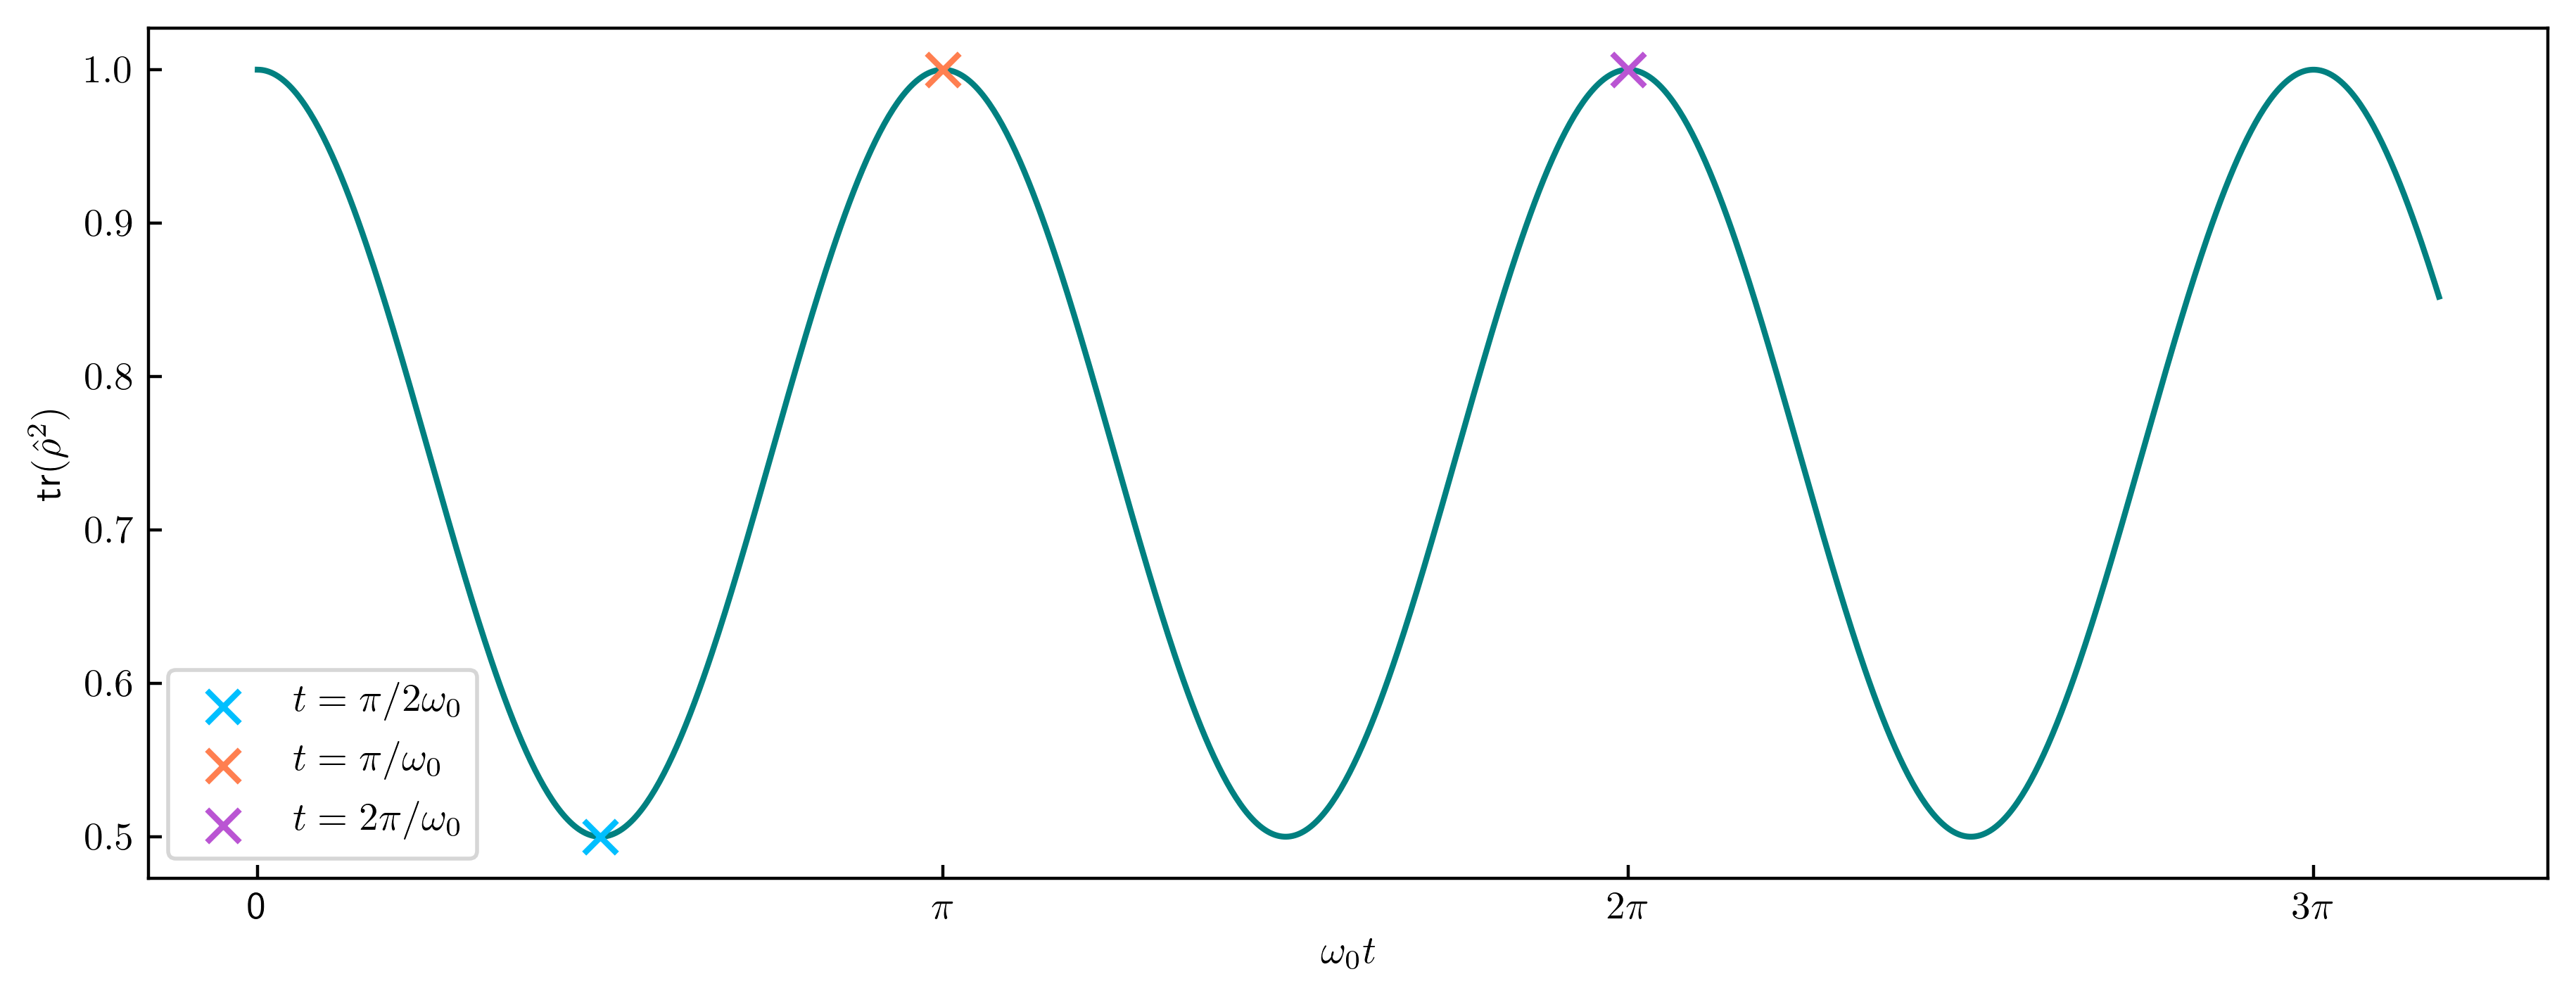

In [9]:
w0 = 1
wt = np.linspace(0, 10*w0, 1000)
def purity(wt):
    return (1+np.cos(wt)**2)/2

plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.plot(wt, purity(wt), c='teal', zorder=1)

special_times = [i*np.pi/(w0) for i in [.5,1,2]]
labels = [r'$t=\pi/2\omega_0 $', r'$t = \pi/\omega_0 $', r'$t=2\pi/\omega_0$']
colors = ['deepskyblue', 'coral', 'mediumorchid']
for i in special_times:
    plt.scatter(i, purity(i), s = 70, marker = 'x', label=labels[special_times.index(i)], color = colors[special_times.index(i)], zorder=2)
    
plt.legend()
plt.xlabel(r'$\omega_0 t$')
plt.xticks([i * np.pi for i in range(int(wt[-1]/np.pi)+1)], ['0', '$\pi$']+['$'+str(i+2)+'\pi$' for i in range(int(wt[-1]/np.pi)-1)])
plt.ylabel(r'tr$(\hat{\rho}^2)$')
plt.show()

## 6. 
Now consider a qubit decoherence model, $\hat{H} = \hbar\omega\hat{\sigma}_z/2$, where the qubit transition frequency is a Gaussian random variable specified by the expectations
$$ \mathbb{E}[\omega] = \omega_0,\qquad \mathbb{E}[(\omega-\omega_0)^2] = g^2.$$

(a) Consider the evolution starting from the initial state $\hat{\rho}(0) = |+\rangle\langle +|$. Simulate $M=20$ random realisations of the qubit dynamics up to a time $\omega_0 t = 30$, with $g = 0.1\omega_0$. Plot the expectation value $\langle \hat{\sigma}_x\rangle$ as a function of time for each realisation (put them all on one plot). 

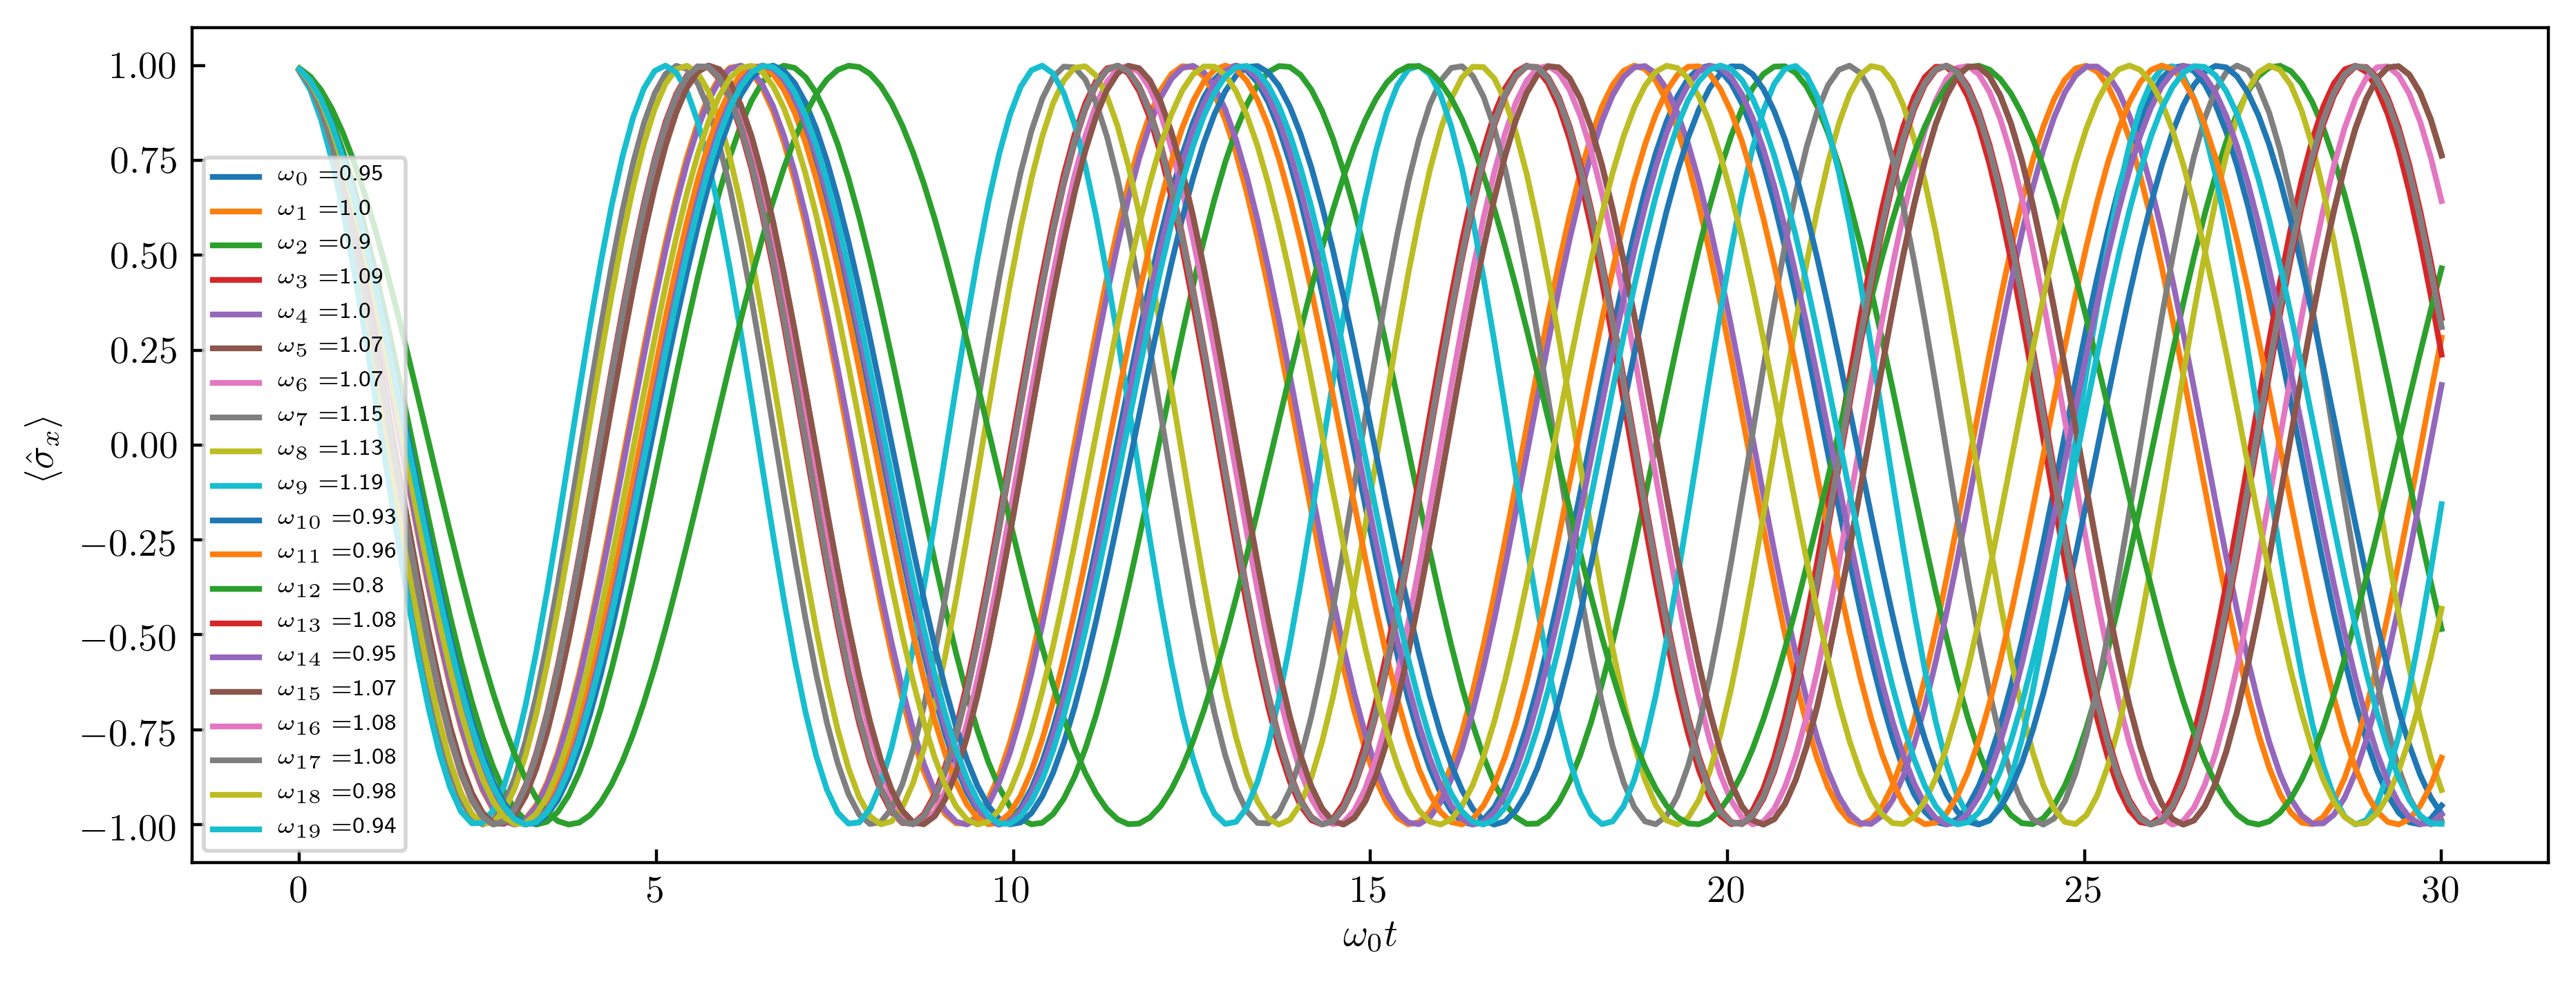

In [10]:
from scipy.linalg import expm
#initialise variables
hbar = 1
w0 = 1
g = 0.1*w0
noise_size = 100
w = np.random.normal(w0, g, noise_size)

zero = np.array([[1], [0]])
one = np.array([[0], [1]])

plus = 1/np.sqrt(2) * (zero + one)
rho0 = plus @ plus.T

X = np.array([[0, 1], [1, 0]])

time_size = 200
t = np.linspace(0, 30*w0, time_size)

def U_evolution(w, dt):
    H = hbar * w / 2 * np.array([[1, 0], [0, -1]])
    Us = expm(-1j * H * dt / hbar)
    return Us

#a random frequency is chosen from the list with normally distributed frequencies initialised, 
#then the time evolution operator for a fixed time step is created and the state is evolved,
#the expectation values of sigma x are stored in Xs and finally ploted

plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
wis = []
for k in range(20):
    wi = w[np.random.randint(noise_size)]
    wis.append(wi)
    U = U_evolution(wi, t[1]-t[0])
    Udag = U.T.conjugate()
    state = rho0
    Xs = []
    for i in t:
        state = U @ state @ Udag
        Xs.append(np.trace(state @ X).real)
    plt.plot(t, Xs, label=r'$\omega_{'+str(k)+'}=$'+str(round(wi, 2)))
plt.xlabel('$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_x\rangle$')
plt.legend(fontsize = 6)
plt.show()  

(b) Plot the sample average of $\langle \hat{\sigma}_x\rangle$ from your simulated trajectories. The sample average is defined as
    $$\overline{\langle \hat{\sigma}_x\rangle}_{\rm samp} = \frac{1}{M} \sum_{m=1}^M \langle \hat{\sigma}_x\rangle_m,$$
    where $\langle \hat{\sigma}_x\rangle_m$ is the result for the $m^{\rm th}$ trajectory. How does this compare to what you expect for a very large number of trajectories $M\to\infty$?

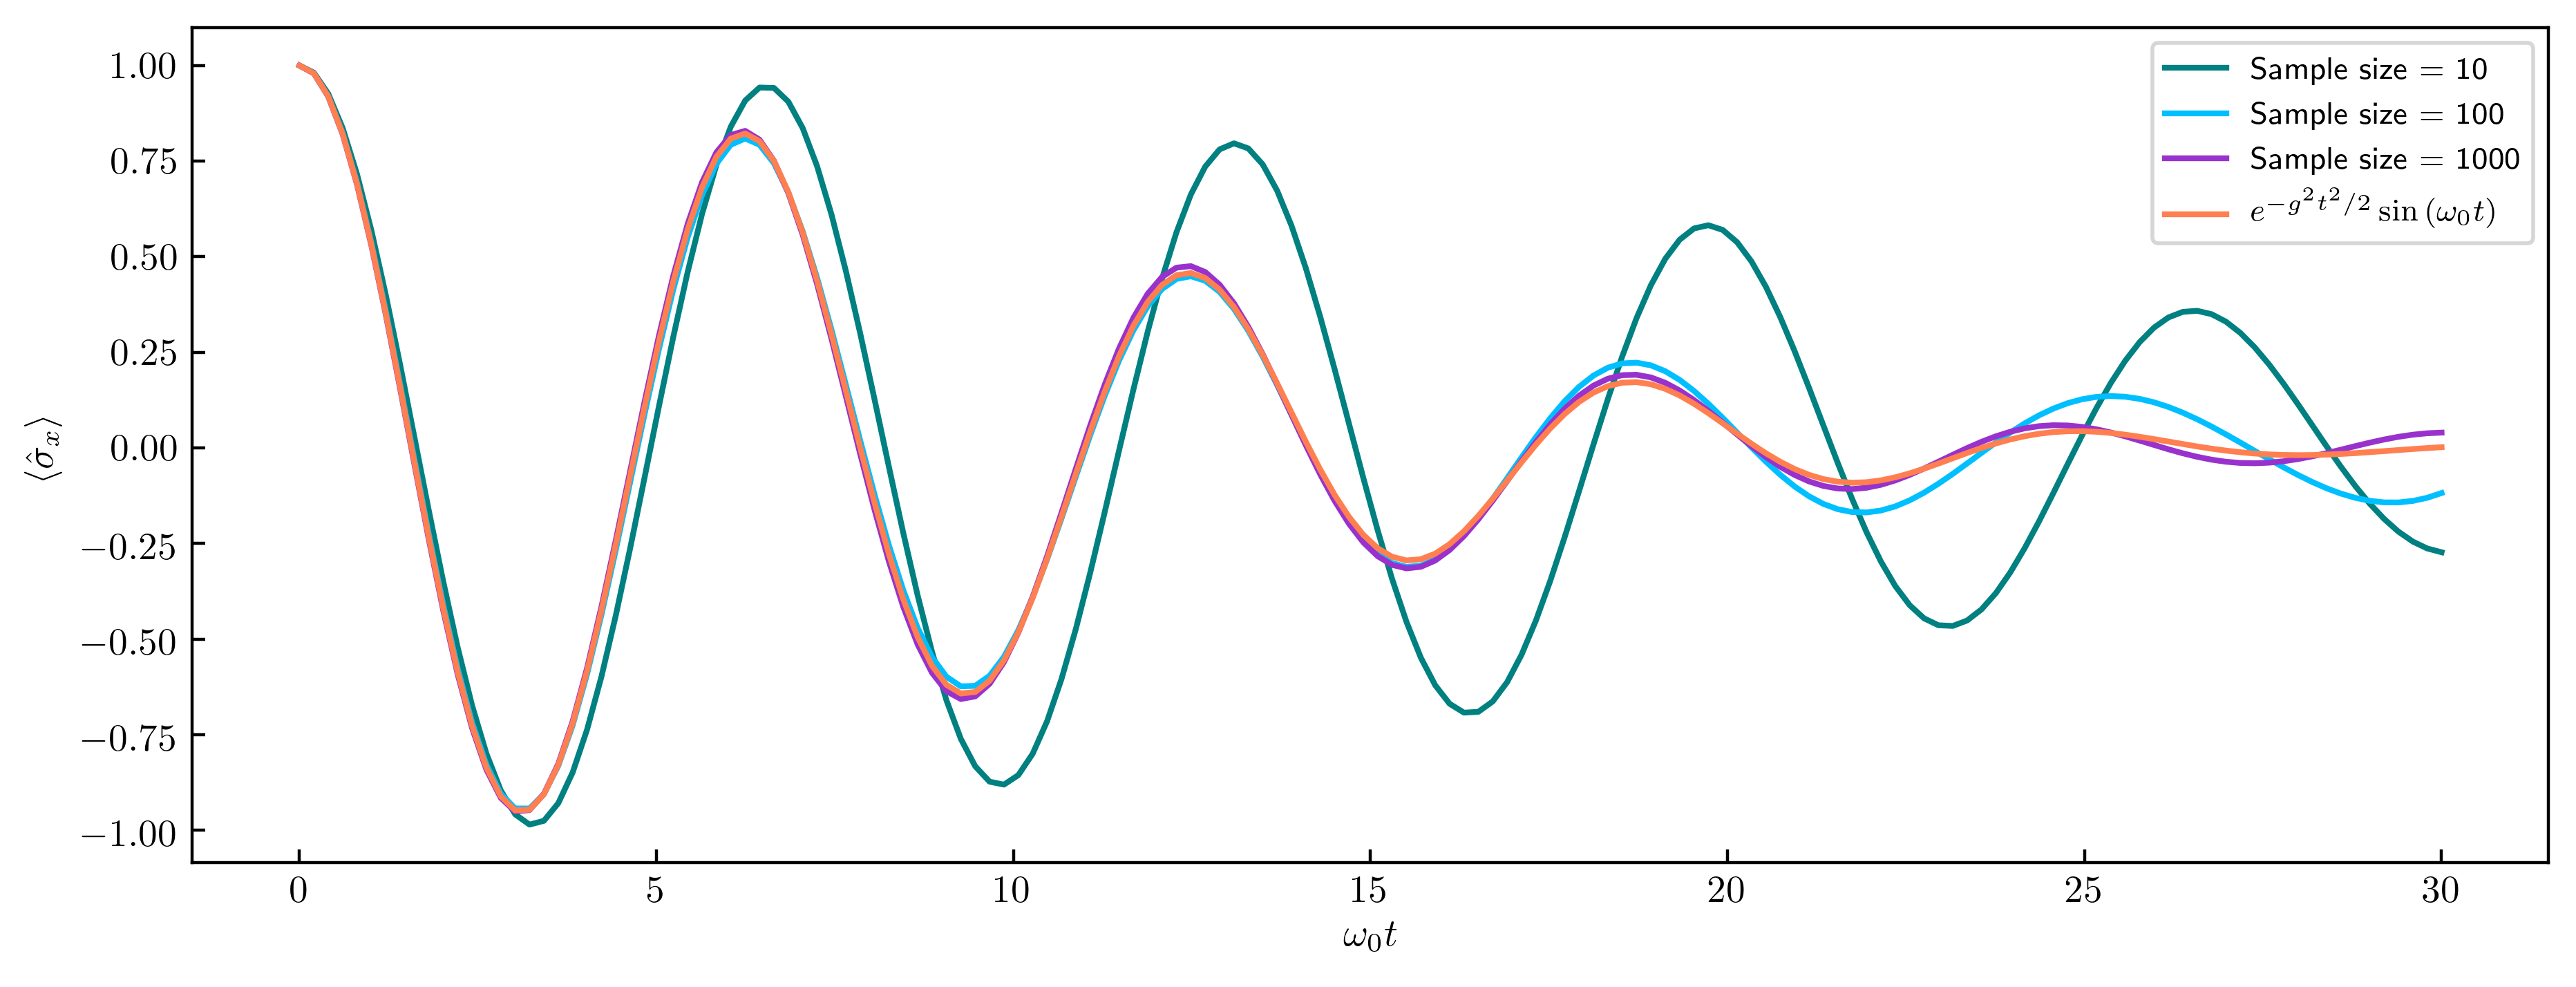

In [11]:
from scipy.linalg import expm
hbar = 1
w0 = 1
g = 0.1*w0

zero = np.array([[1], [0]])
one = np.array([[0], [1]])

plus = 1/np.sqrt(2) * (zero + one)
rho0 = plus @ plus.T

X = np.array([[0, 1], [1, 0]])

time_size = 150
t = np.linspace(0, 30*w0, time_size)

def U_evolution(w, dt):
    H = hbar * w / 2 * np.array([[1, 0], [0, -1]])
    Us = expm(-1j * H * dt / hbar)
    return Us

def X_expectation(rho):
    trace = np.trace(rho @ X)
    return trace.real

Xs = [] #to store different sample size data (that will be averaged later)
dt = t[1]-t[0]
rho = rho0
for k in range(1, 4):
    noise_size = 10**k #bigger noise_size means the distribution is closer to the perfect gaussian
    w = np.random.normal(w0, g, noise_size)
    Xi = [] #X values in all times with different freq sample size
    for i in range(int(10**k)):
        wi = w[np.random.randint(noise_size)]
        Xt = [] #values at every time for a certain freq
        U = U_evolution(wi, dt)
        rho = rho0
        for j in t:
            Xt.append(X_expectation(rho))
            rho = U @ rho @ U.T.conjugate()
        Xi.append(Xt)
    Xs.append(Xi)

col = ['teal', 'deepskyblue', 'darkorchid']
#initialisation of the figure    
plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
#the previously computed data is retrieved and averaged
for i in range(len(Xs)):
    plt.plot(t, [np.average([Xs[i][j][k] for j in range(len(Xs[i]))]) for k in range(len(t))], c = col[i], label='Sample size = '+str(10**(i+1)))
plt.plot(t, [np.exp(-g**2*i**2/2) * np.cos(w0*i) for i in t], label=r'$e^{-g^2t^2/2}\sin{(\omega_0t)}$', c='coral')
plt.xlabel('$\omega_0t$')
plt.ylabel(r'$\langle\hat{\sigma}_x\rangle$')
plt.legend(fontsize = 8)
plt.show() 

It can be seen that as the amount of trajectories (M) is increased, the $\langle\hat{\sigma}_x\rangle(t)$ converges towards the analytical expectation value for $M\to\infty$

## 7. 
The amplitude damping channel is a CPTP map for a qubit that describes the loss of energy, e.g. through spontaneous emission. The map is specified by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r} \hat{\sigma}_+\hat{\sigma}_- + \hat{\sigma}_-\hat{\sigma}_+,\qquad \hat{K}_1 = \sqrt{r}\hat{\sigma}_-,$$
where $\hat{\sigma}_\pm = \frac{1}{2}(\hat{\sigma}_x\pm{\rm i}\hat{\sigma}_y)$ are the usual qubit raising and lowering operators. 

(a) Verify that the Kraus operators above constitute a CPTP map.

(b) Starting from the superposition state $\hat{\rho} = |+\rangle\langle +|$, with $|+\rangle = \tfrac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$, find the density matrix $\mathcal{E}(\hat{\rho})$ (e.g. numerically) and plot the expectation values of the three Pauli operators $\hat{\sigma}_{x,y,z}$ as a function of $r$.

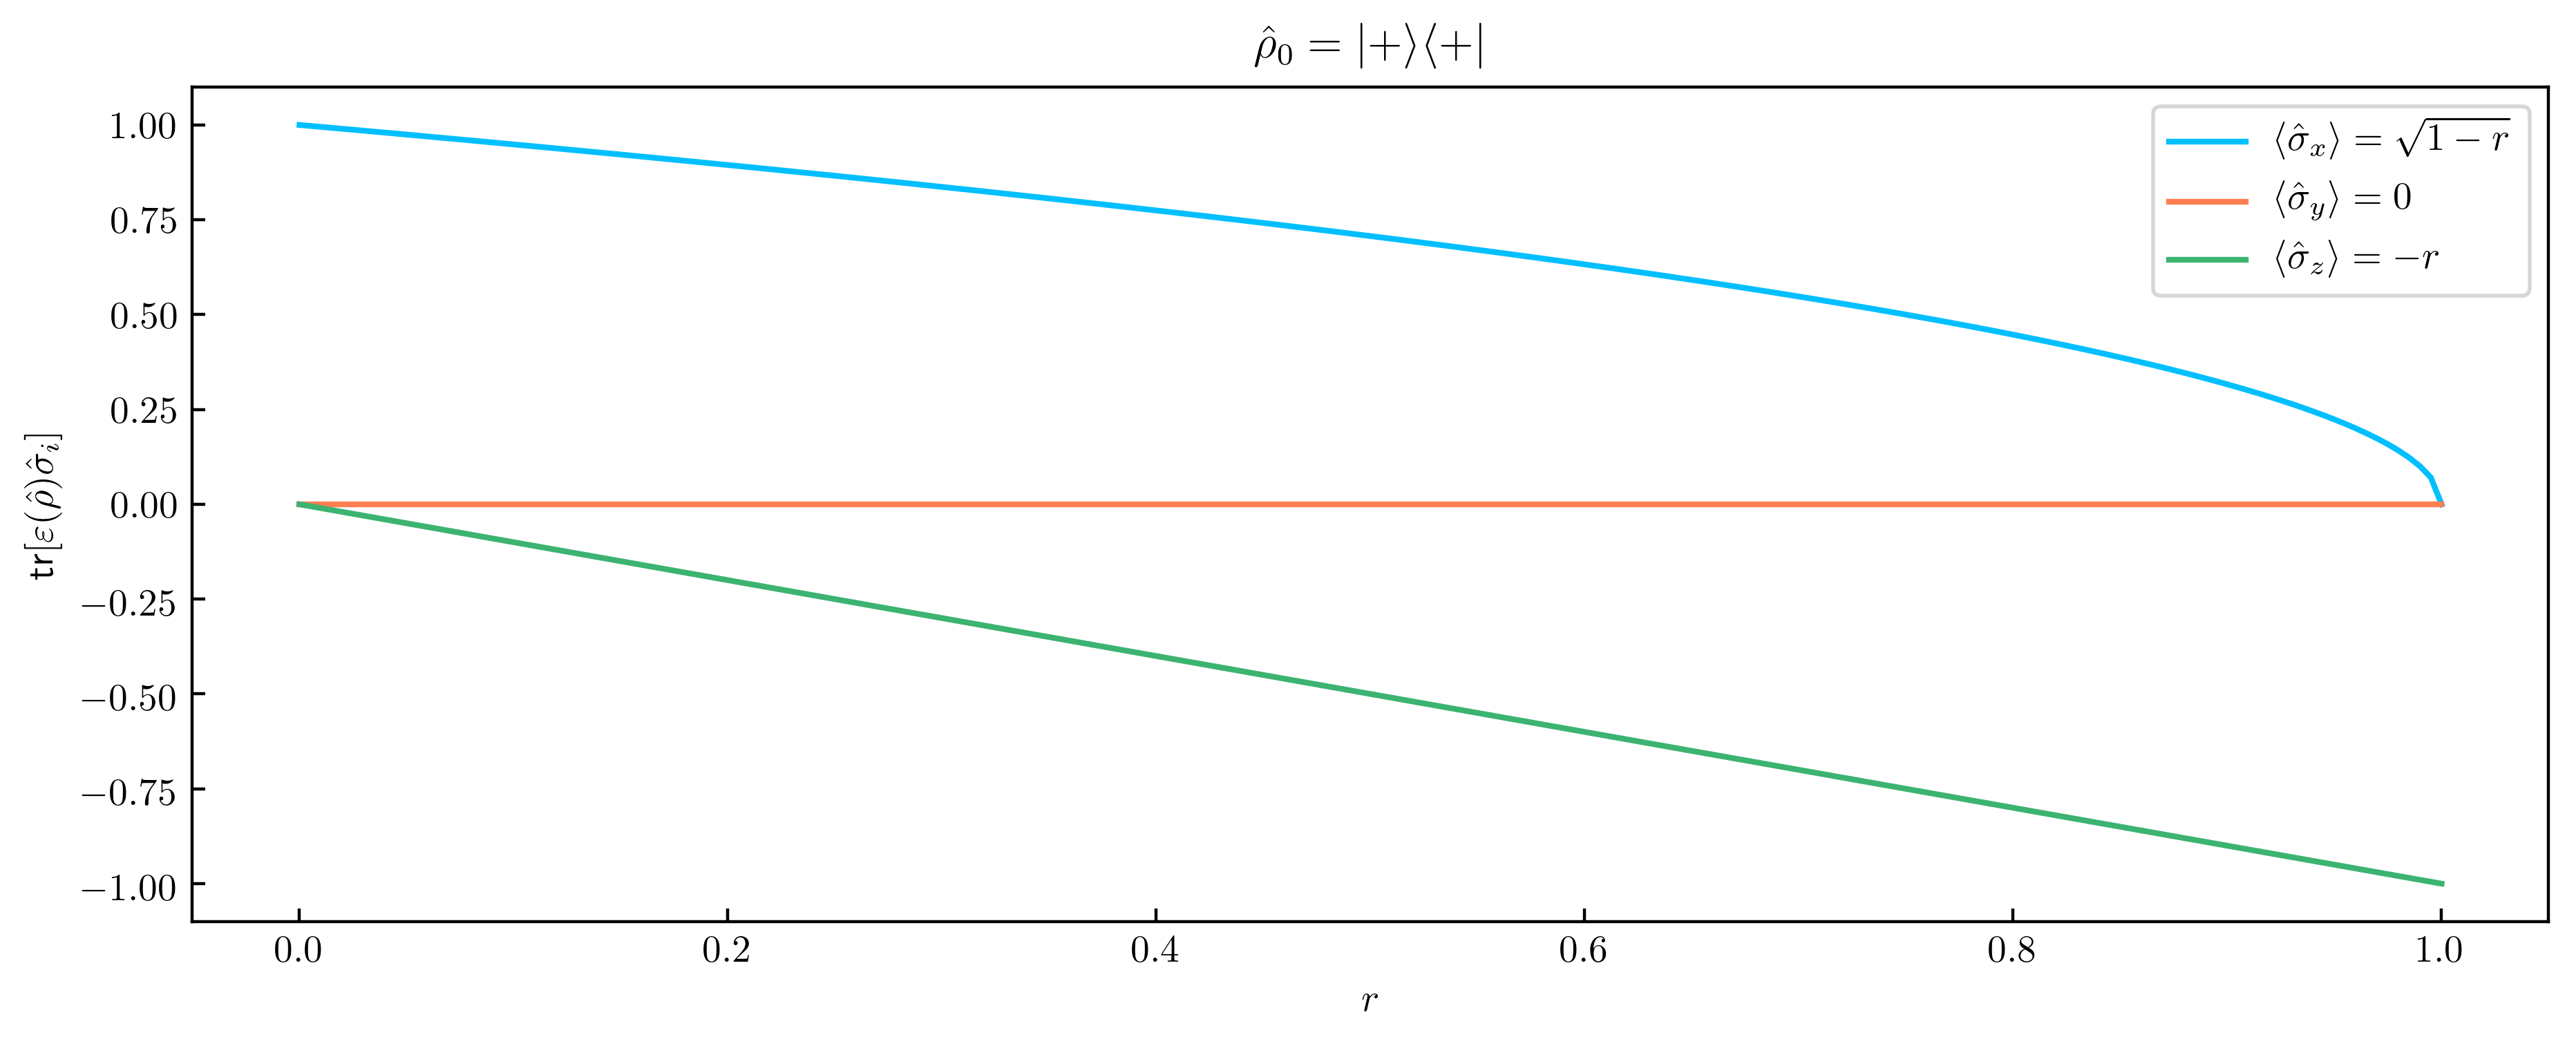

In [12]:
zero = np.array([[1], [0]])
one = np.array([[0], [1]])

plus = 1/np.sqrt(2) * (zero + one)
rho0 = plus @ plus.T

raising = zero @ one.T.conjugate()
lowering = raising.T.conjugate()

def kraus(r):
    K0 = np.sqrt(1-r)*(raising @ lowering) + lowering @ raising
    K1 = np.sqrt(r) * lowering
    return K0, K1
def mapping(rho, r):
    K0, K1 = kraus(r)
    return K0 @ rho @ K0.T.conjugate() + K1 @ rho @ K1.T.conjugate()

size = 200
r = np.linspace(0, 1, size)
maps = [mapping(rho0, i) for i in r]
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
#expectation values
exp_X = [np.trace(X @ i).real for i in maps]
exp_Y = [np.trace(Y @ i).real for i in maps]
exp_Z = [np.trace(Z @ i).real for i in maps]

plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.plot(r, exp_X, label = r'$\langle\hat{\sigma}_x\rangle = \sqrt{1-r}$', c='deepskyblue')
plt.plot(r, exp_Y, label = r'$\langle\hat{\sigma}_y\rangle = 0$', c='coral')
plt.plot(r, exp_Z, label = r'$\langle\hat{\sigma}_z\rangle = -r$', c='mediumseagreen')
plt.xlabel(r'$r$')
plt.ylabel(r'tr$[\varepsilon(\hat{\rho}) \hat{\sigma}_i]$')
plt.title(r'$\hat{\rho}_0 = |+\rangle\langle+|$')
plt.legend()
plt.show()

(c) Now let us interpret the above Kraus operators as representing a generalised measurement with two outcomes. Write down analytical expressions for the probabilities of these two outcomes and the corresponding post-measurement states, assuming an arbitrary initial density matrix $\hat{\rho}$. Plot a histogram of the results that might be obtained from 200 such measurements on the state $\hat{\rho} = |+\rangle\langle +|$, assuming that $r=0.5$.

P(0)= 0.75 
 P(1)= 0.25


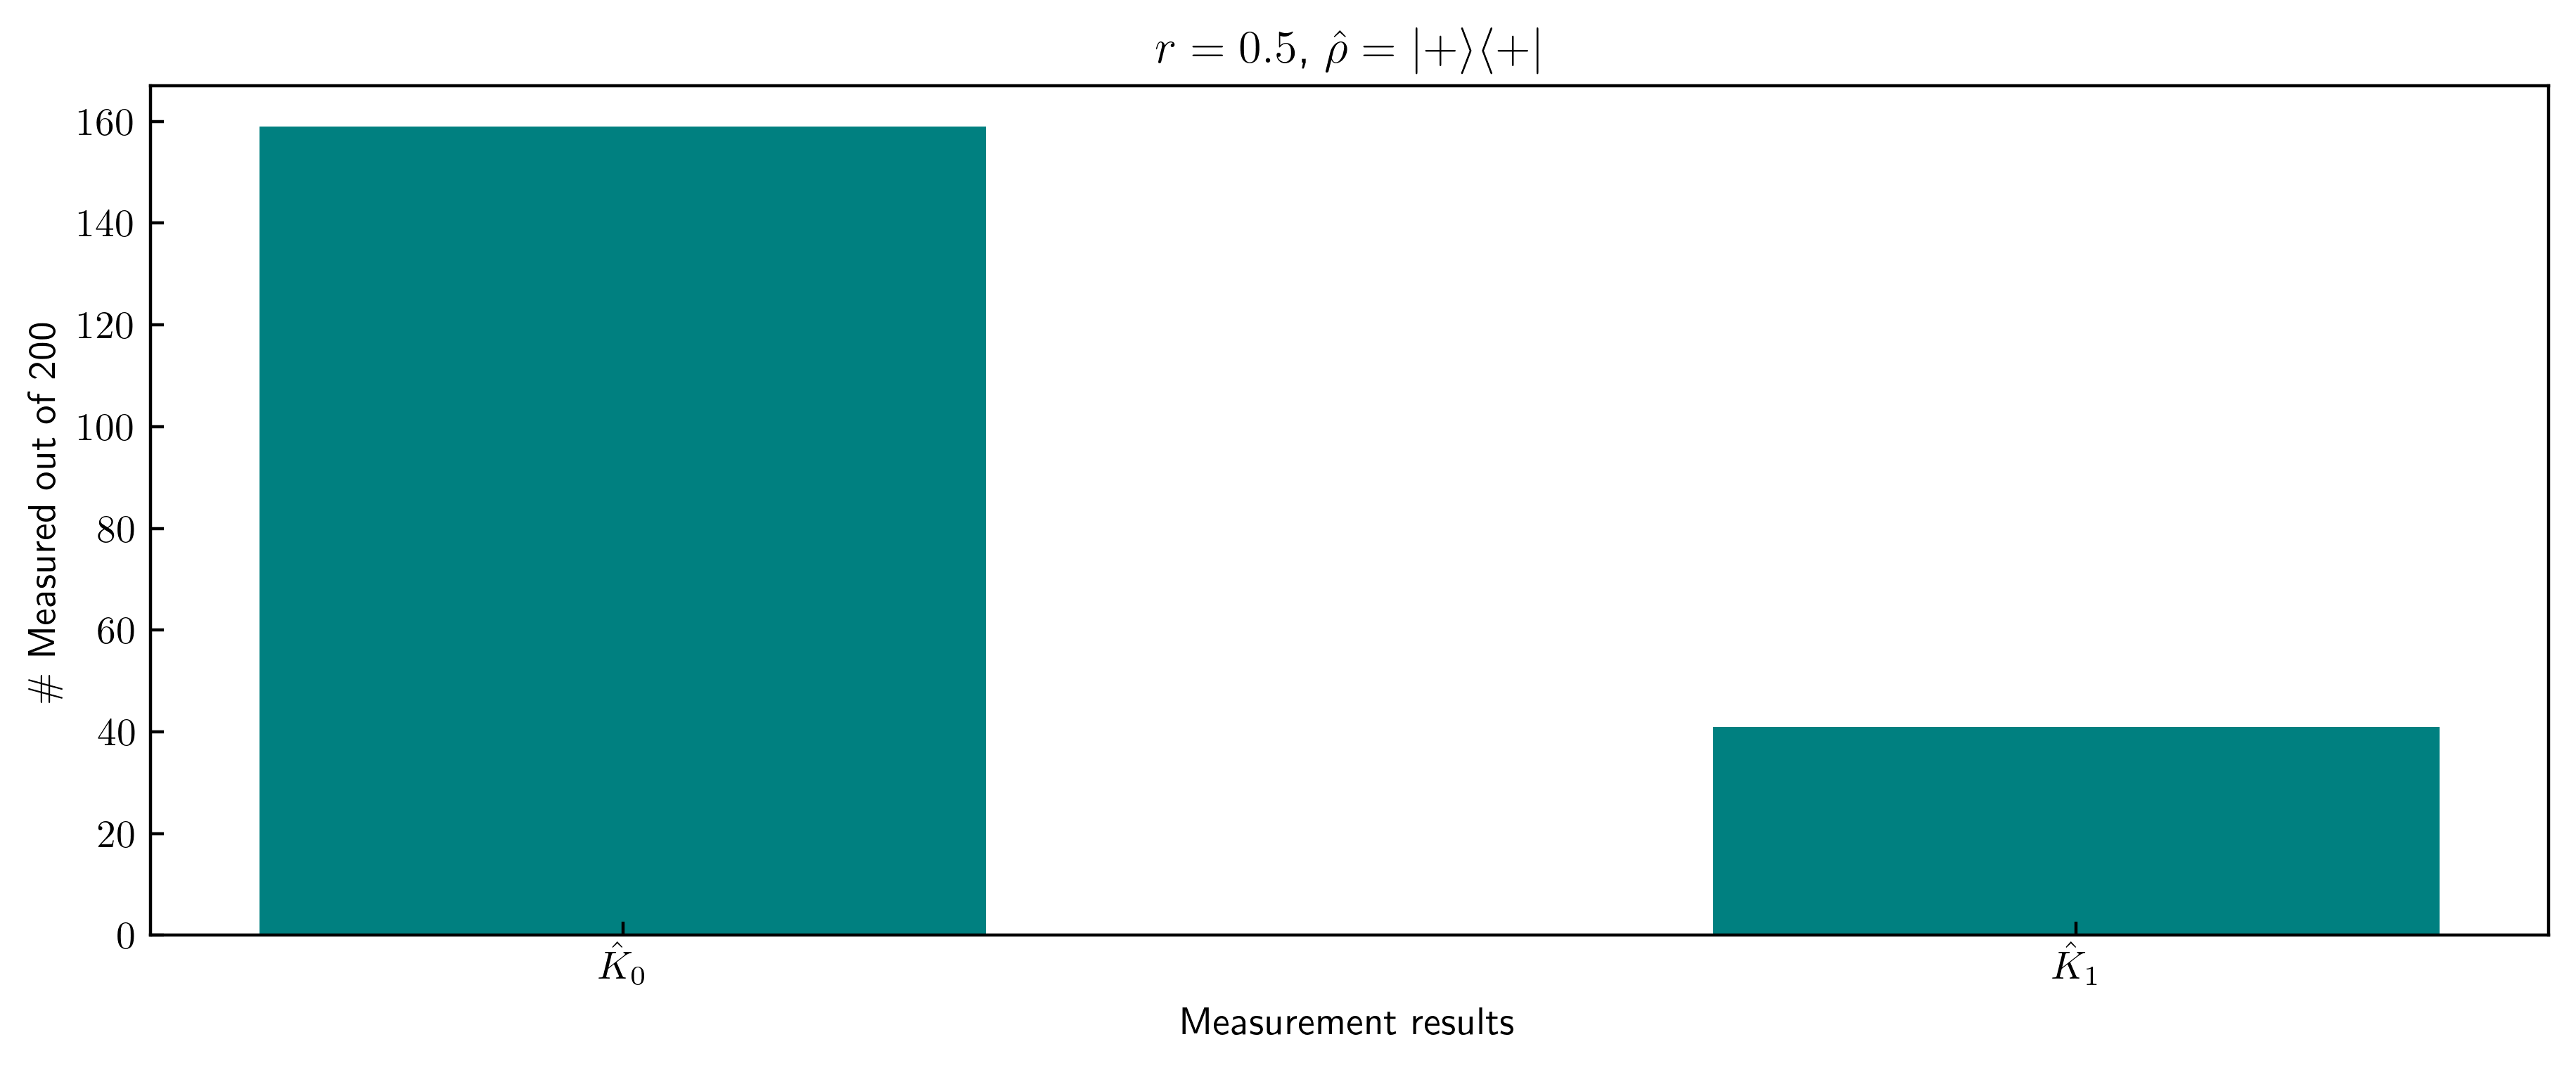

In [13]:

rho = plus @ plus.T
r = 0.5
K0, K1 = kraus(r)
p0 = np.trace(K0 @ rho @ K0.T.conjugate()).real
p1 = np.trace(K1 @ rho @ K1.T.conjugate()).real
p_total = p0 + p1
print('P(0)=',round(p0, 3),'\n','P(1)=', round(p1, 3))

#there are 2 possible outcomes, 0 and 1, with probabilities p0 and p1
measurements_size = 200
outcomes = [biased_coin(p0) for i in range(measurements_size)]
plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.hist(outcomes, [-.25,.25,.75,1.25], color='teal')
plt.xticks([0,1], [r'$\hat{K}_0$', r'$\hat{K}_1$'])
plt.xlabel(r'Measurement results')
plt.ylabel(r'\# Measured out of '+str(measurements_size))
plt.title(r'$r=0.5$, $\hat{\rho}=|+\rangle\langle+|$')
plt.show()

(d) Now consider the generalised measurement defined by the Kraus operators
$$ \hat{K}_0 = \sqrt{1-r}\hat{\sigma}_+\hat{\sigma}_-, \qquad \hat{K}_1 = \hat{\sigma}_-\hat{\sigma}_+, \qquad \hat{K}_2 = \sqrt{r}\hat{\sigma}_-.$$
As in part (c), give general expressions for the probabilities of each outcome and the corresponding post-measurement state. Simulate the outcome (i.e. plot a histogram) of 200 measurements on the state $\hat{\rho} = |+\rangle\langle +|$. How does this measurement differ from the one in part (c)?

P(0)= 0.25 
 P(1)= 0.5 
 P(2)= 0.25


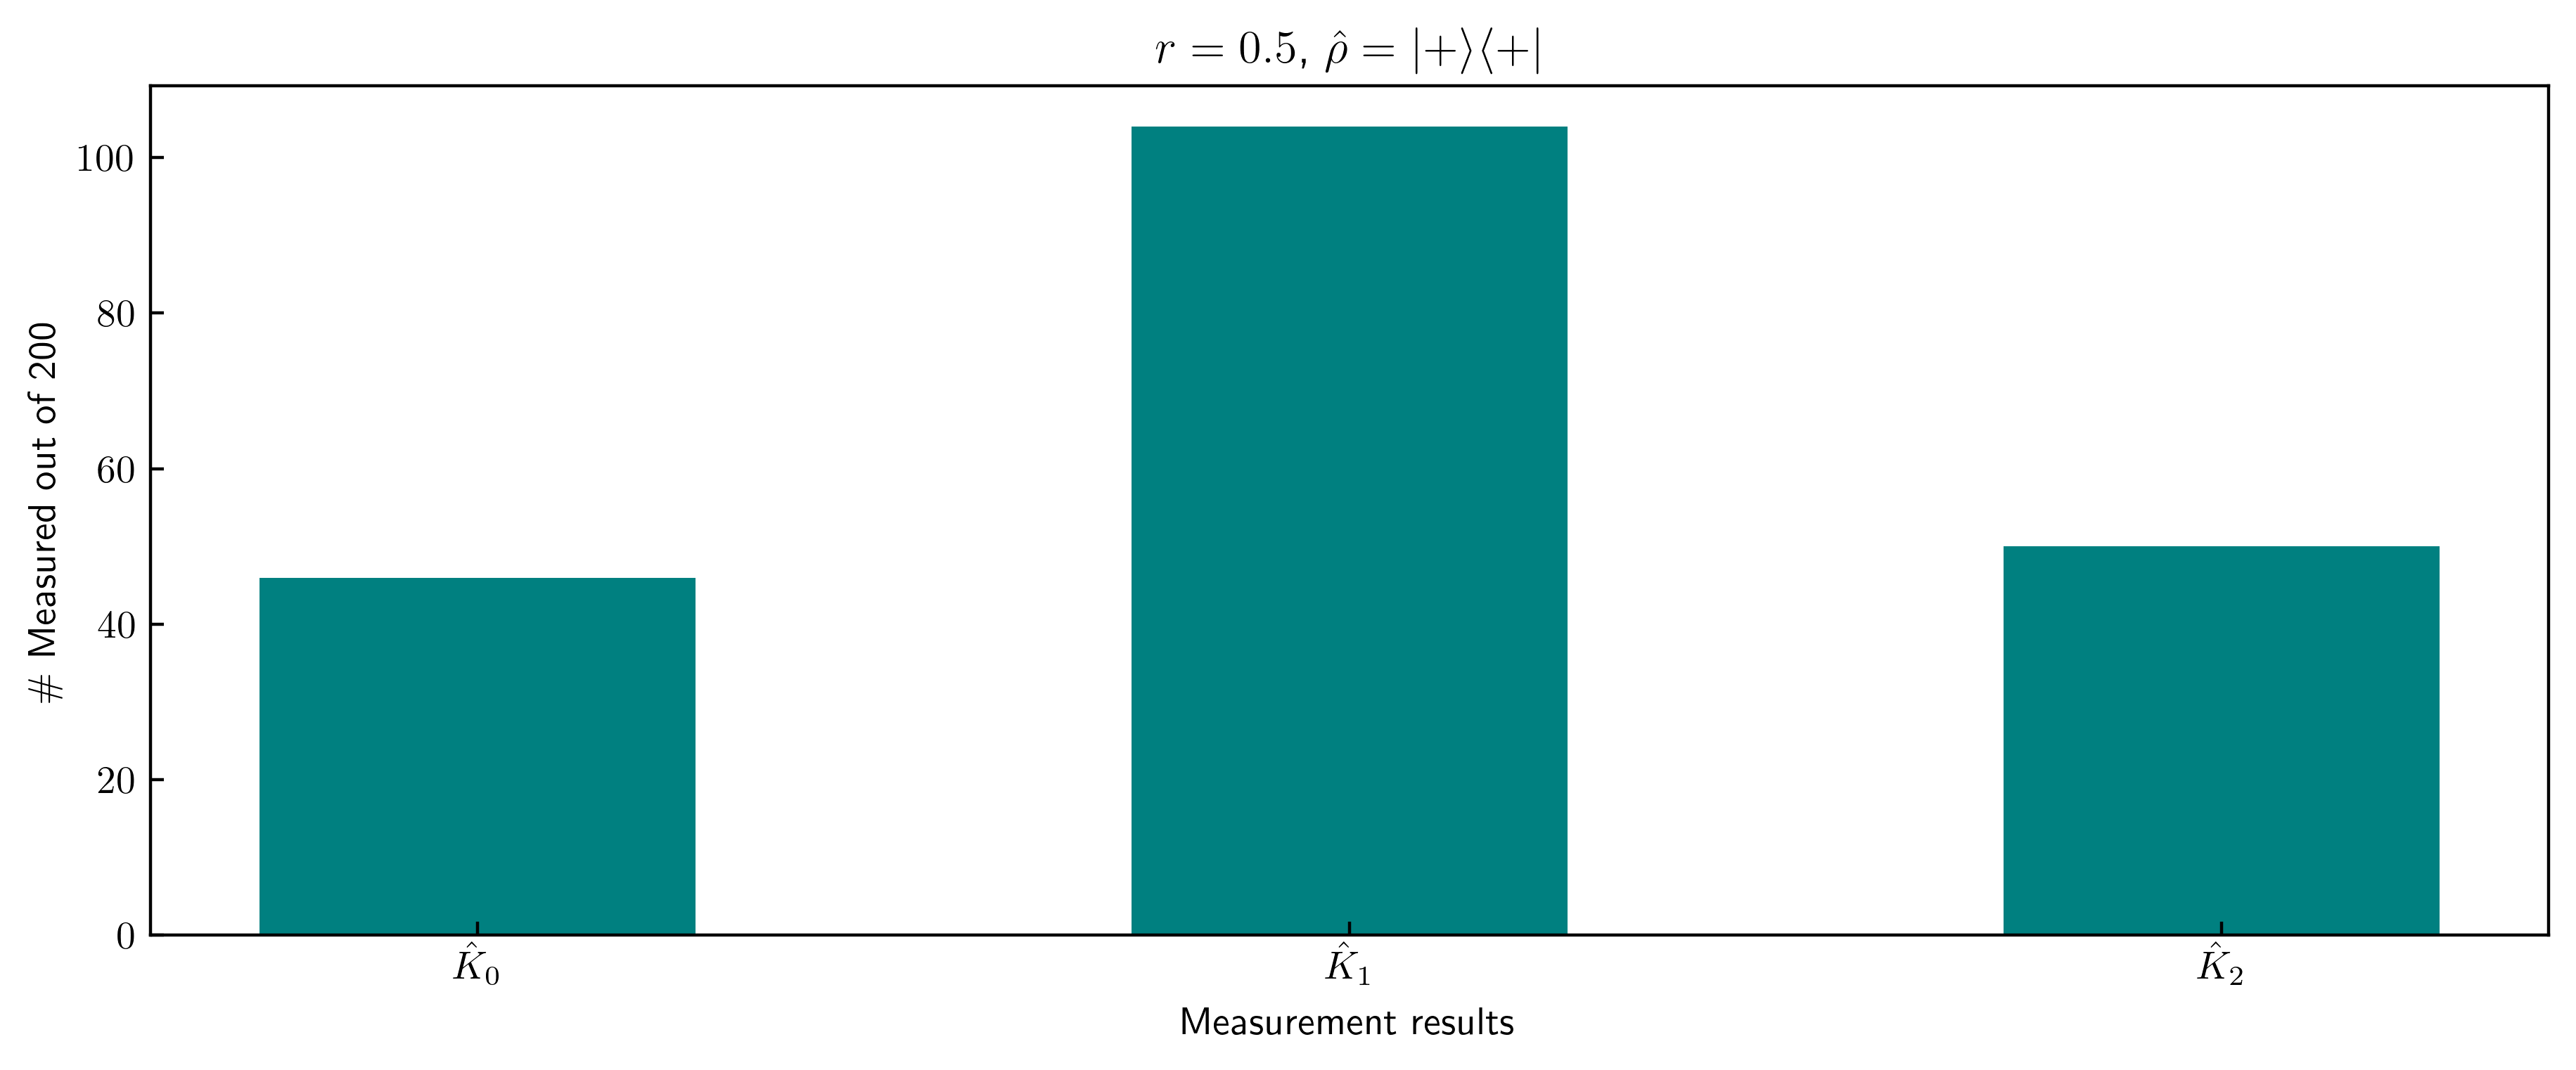

In [14]:
#defining new kraus operators
def kraus7d(r):
    K0 = np.sqrt(1-r)*(raising @ lowering) 
    K1 = lowering @ raising
    K2 = np.sqrt(r) * lowering
    return K0, K1, K2

rho = plus @ plus.T
r = 0.5
K0, K1, K2 = kraus7d(r)
p0 = np.trace(K0 @ rho @ K0.T.conjugate()).real
p1 = np.trace(K1 @ rho @ K1.T.conjugate()).real
p2 = np.trace(K2 @ rho @ K2.T.conjugate()).real

p_total = p0 + p1 + p2
print('P(0)=',round(p0, 3),'\n','P(1)=', round(p1, 3),'\n','P(2)=', round(p2, 3))
#there are 2 possible outcomes, 0 and 1, with probabilities p0 and p1
measurements_size = 200
outcomes = [triple_coin(p0, p1) for i in range(measurements_size)]
plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.hist(outcomes, [-.25,.25,.75,1.25, 1.75, 2.25], color='teal')
plt.xticks([0,1,2], [r'$\hat{K}_0$', r'$\hat{K}_1$', r'$\hat{K}_2$'])
plt.xlabel(r'Measurement results')
plt.ylabel(r'\# Measured out of '+str(measurements_size))
plt.title(r'$r=0.5$, $\hat{\rho}=|+\rangle\langle+|$')
plt.show()

This measurement differs from the previous one because independently of the result the post-measurement state becomes a pure state.

## 8. 
(a) The partial trace over one qubit of a two-qubit system is defined by

$$ \hat{\rho}_A = {\rm tr}_B ( \hat{\rho}) = \sum_{j=0}^1 \langle b_j| \hat{\rho}|b_j\rangle = \sum_{j=0}^1 (\hat{\mathbb{1}}_A\otimes\langle b_j|) \hat{\rho}(\hat{\mathbb{1}}_A\otimes| b_j\rangle), $$

where $\{|b_j\rangle\}$ is any orthonormal basis in the Hilbert space of qubit $B$. Assume that $|b_{0}\rangle = |0\rangle$ and $|b_1\rangle = |1\rangle$ are the computational basis states. Construct the Kraus operators describing the above CPTP map. Verify numerically that the Kraus operators obey the completeness relation required for a CPTP map.

In [15]:
zero = np.array([[1], [0]])
one = np.array([[0], [1]])

I = zero @ zero.T + one @ one.T

b0 = zero
b1 = one

def kraus8a():
    K0 = np.kron(I, b0.T)
    K1 = np.kron(I, b1.T)
    return K0, K1

K0, K1 = kraus8a()

if np.allclose(K0.T @ K0 + K1.T @ K1, np.kron(I, I)):
    print('The completeness relation is satisfied:D')

The completeness relation is satisfied:D


The required completeness relation is: $$ \sum_\mu \hat{K}_\mu^\dagger \hat{K}_\mu = \hat{\mathbb{1}} $$
Which is what has been shown in the previous cell of code, having defined the Kraus operators as: 
$$ \hat{K}_\mu = \hat{\mathbb{1}}_A \otimes \langle b_\mu | \hspace{2cm} \hat{K}_\mu^\dagger = \hat{\mathbb{1}}_A \otimes | b_\mu\rangle \hspace{2cm} \mu=0,1$$ 

(b) Now consider again the two-qubit problem described by the Hamiltonian

$$ \hat{H}  = -\frac{\hbar\omega_A}{2} \hat{\sigma}_z\otimes \hat{\mathbb{1}} -  \frac{\hbar\omega_B}{2} \hat{\mathbb{1}}\otimes \hat{\sigma}_z + \frac{\hbar J}{4} \left ( \hat{\sigma}_x \otimes \hat{\sigma}_x + \hat{\sigma}_y \otimes \hat{\sigma}_y \right  ) + \frac{\hbar V}{2}  \hat{\sigma}_z\otimes \hat{\sigma}_z,$$

which we saw in question 8 of Worksheet 1. Simulate the dynamics starting from the pure state $|\psi(0)\rangle = |10\rangle$. Use the parameters $\omega_A = \omega_B$ and $J=V = 0.5\omega_A$, and simulate up to a time $Jt = 20$. (You can either re-use your solution from Worksheet 1, or adapt the code from the solution provided.) Compute the reduced density matrix of qubit $A$ and plot its purity, $P = {\rm tr}(\hat{\rho}_A^2)$, as a function of time.

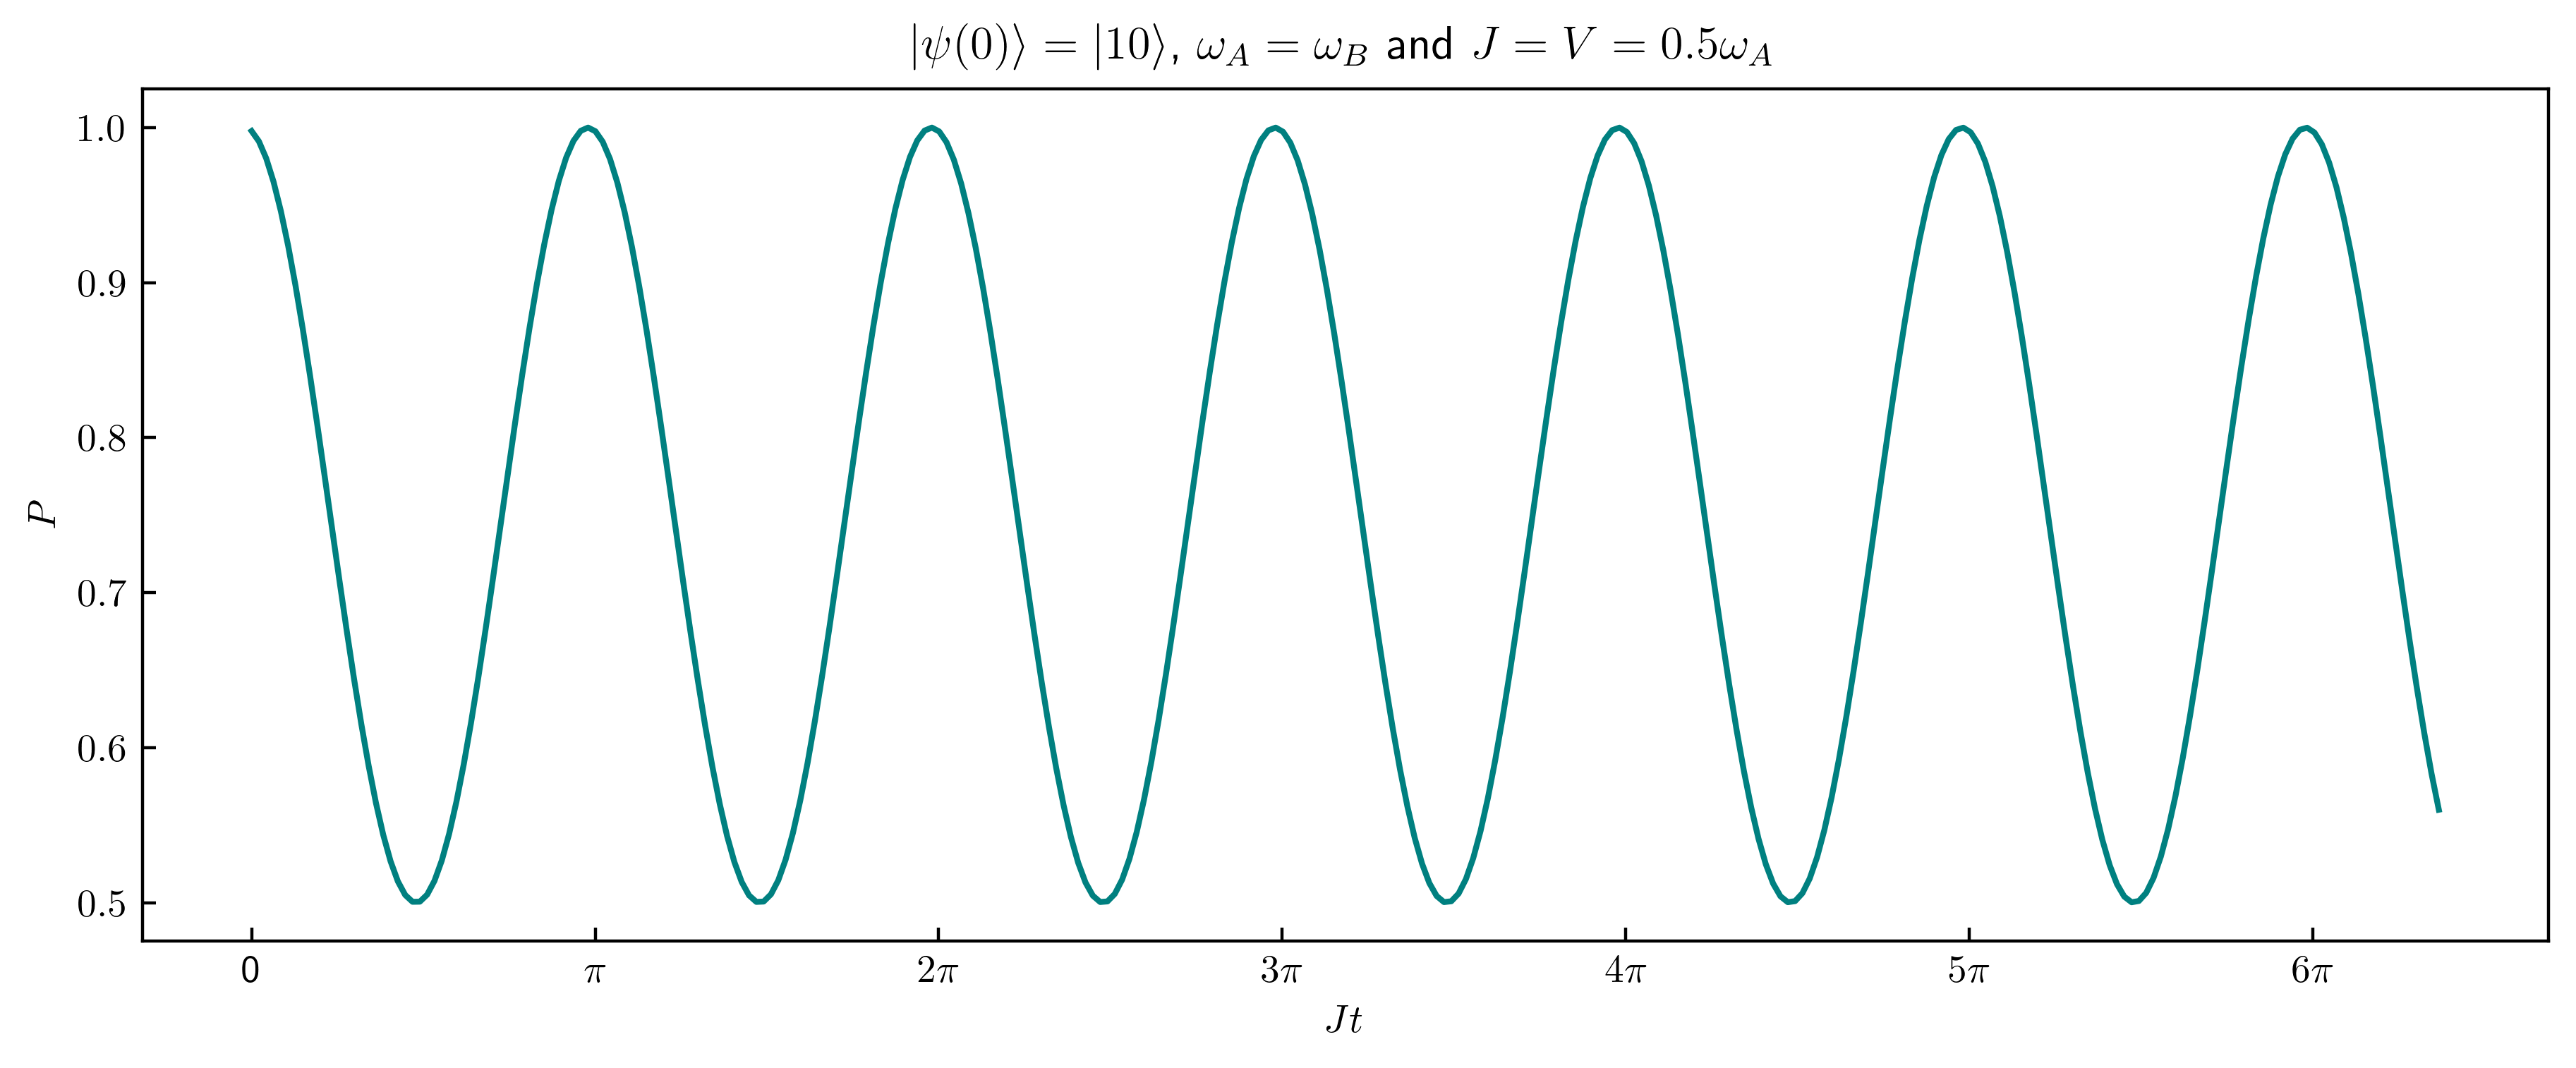

In [16]:
from scipy.linalg import expm

#defining values
hwa = 1
hwb = hwa
hj = 0.5 * hwa
hv = 0.5 * hwa

time_size = 300
t = np.linspace(0, 20/hj, time_size)

#pauli matrices and identity
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])
Z = np.array([[1, 0], [0, -1]])
I = np.array([[1, 0], [0, 1]])

#states 0&1 from single-qubit pauli matrix z
zero = np.array([[1], [0]])
one = np.array([[0], [1]])

#defining the Hamiltonian
def H():
    return -hwa/2 * np.kron(Z, I) - hwb/2 * np.kron(I, Z) + hj/4 * (np.kron(X, X) + np.kron(Y, Y)) + hv/2 * np.kron(Z, Z)

#evolution operator
def unitary(time):
    return expm(-1j* time * H())

def dmatrix_evolution(time, U, rho):
    return unitary(time) @ rho @ unitary(time).T.conjugate()

#function that calculates the expectation value
def expectation_value(state, operator):
    e = state.T.conjugate() @ operator @ state
    return float(e.real)

state = np.kron(one, zero) @ np.kron(one, zero).T
dt = t[1]-t[0]
U = unitary(dt)
Udag = U.T.conjugate()
rhos_evolved = []
for i in t:
    rhos_evolved.append(U @ state @ Udag)
    state = U @ state @ Udag

K0, K1 = kraus8a()
reduced_rhos = [K0 @ i @ K0.T.conjugate() + K1 @ i @ K1.T.conjugate() for i in rhos_evolved]

P_8b = [np.trace(i@i).real for i in reduced_rhos]

plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.plot([i*hj for i in t], P_8b, c='teal')
plt.xlabel(r'$Jt$')
plt.ylabel(r'$P$')
plt.xticks([i*np.pi for i in range(7)], ['0', r'$\pi$']+['$'+str(i+2)+'\pi$' for i in range(5)])
plt.title(r'$|\psi(0)\rangle = |10\rangle$, $\omega_A = \omega_B$ and $J=V = 0.5\omega_A$')
plt.show()


(c) Repeat the purity calculation of part (b) but with the parameters $\omega_A = 2\omega_B$ and $J=V=0.5\omega_A$. Comment on the differences between the results of (b) and (c).

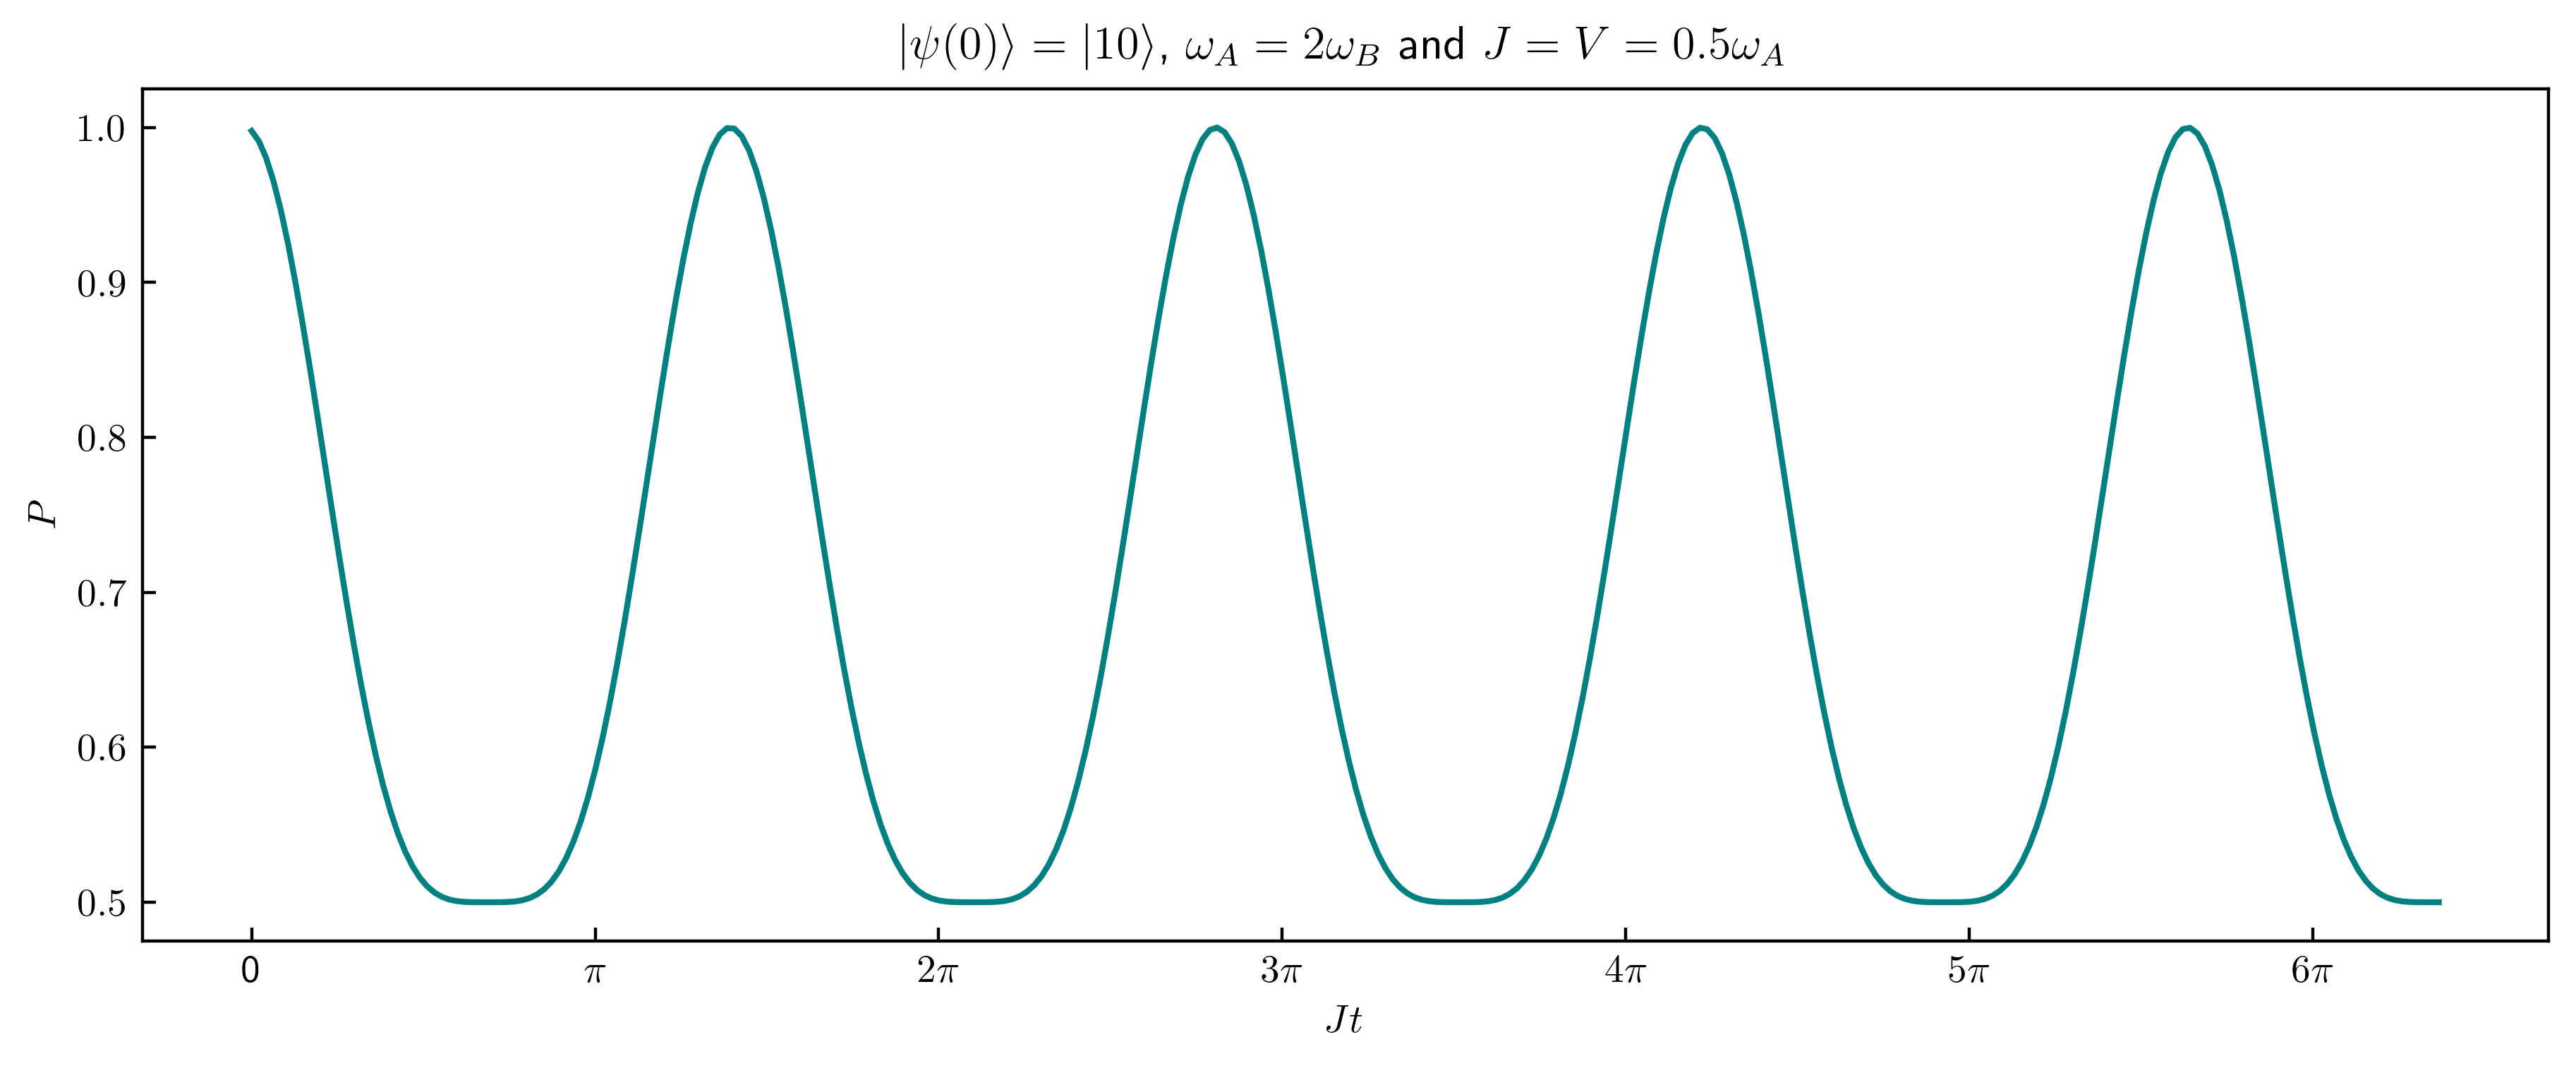

In [17]:
#defining values
hwa = 1
hwb = 1/2 * hwa
hj = 0.5 * hwa
hv = 0.5 * hwa

time_size = 300
t = np.linspace(0, 20/hj, time_size)

state = np.kron(one, zero) @ np.kron(one, zero).T
dt = t[1]-t[0]
U = unitary(dt)
Udag = U.T.conjugate()
rhos_evolved = []
for i in t:
    rhos_evolved.append(U @ state @ Udag)
    state = U @ state @ Udag

K0, K1 = kraus8a()
reduced_rhos = [K0 @ i @ K0.T.conjugate() + K1 @ i @ K1.T.conjugate() for i in rhos_evolved]

P_8c = [np.trace(i@i).real for i in reduced_rhos]

plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.plot([i*hj for i in t], P_8c, c='teal')
plt.xticks([i*np.pi for i in range(7)], ['0', r'$\pi$']+['$'+str(i+2)+'\pi$' for i in range(5)])
plt.xlabel(r'$Jt$')
plt.ylabel(r'$P$')
plt.title(r'$|\psi(0)\rangle = |10\rangle$, $\omega_A = 2\omega_B$ and $J=V = 0.5\omega_A$')
plt.show()

In the case of different local qubit energies ($\omega_A\neq \omega_B$) we can see a decresase of the frequency at which the evolved state is pure. In addition, the time spans at which the state is maximally mixed (the purity reaches its minimum value $1/2$) increase.

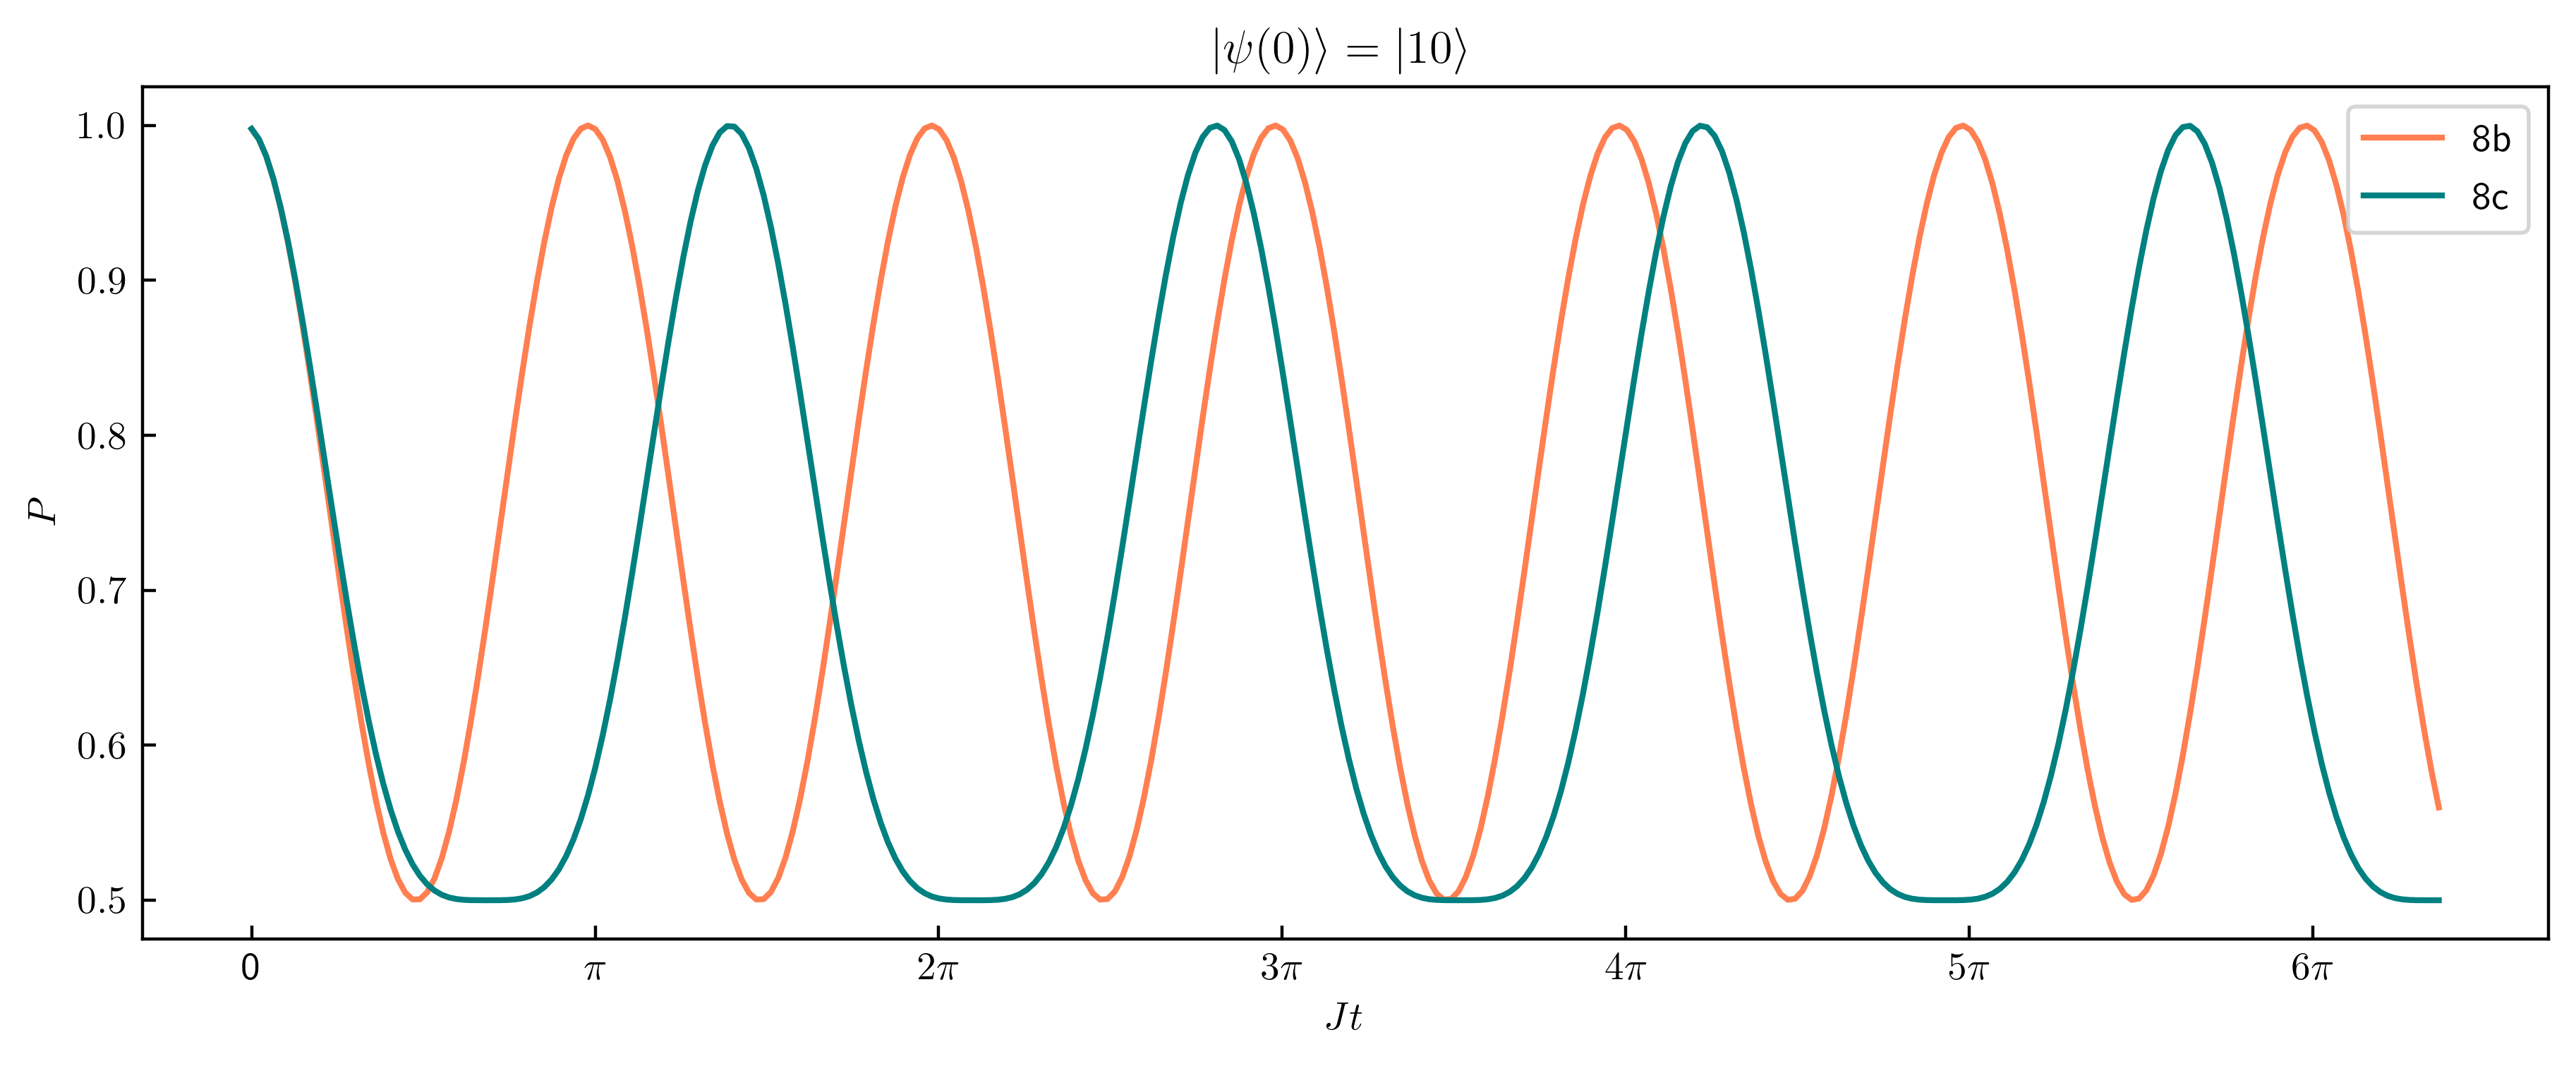

In [18]:
plt.figure(figsize = (11,4), dpi=400)
plt.tick_params(axis="both", direction="in")
plt.plot([i*hj for i in t], P_8b, c='coral', label='8b')
plt.plot([i*hj for i in t], P_8c, c='teal', label='8c')
plt.xticks([i*np.pi for i in range(7)], ['0', r'$\pi$']+['$'+str(i+2)+'\pi$' for i in range(5)])
plt.xlabel(r'$Jt$')
plt.ylabel(r'$P$')
plt.title(r'$|\psi(0)\rangle = |10\rangle$')
plt.legend()
plt.show()